>Import required libraries 

In [136]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

>Read the Walmart dataset

In [127]:
Walmart = pd.read_csv('Walmart DataSet.csv')

>Display Walmart dataset

In [128]:
Walmart

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

>Check for Null values in the dataset
<br>**Insight: No null values**

In [129]:
Walmart3 = Walmart[['Date','Weekly_Sales']]
Walmart3

Date  Weekly_Sales
0     05-02-2010    1643690.90
1     12-02-2010    1641957.44
2     19-02-2010    1611968.17
3     26-02-2010    1409727.59
4     05-03-2010    1554806.68
...          ...           ...
6430  28-09-2012     713173.95
6431  05-10-2012     733455.07
6432  12-10-2012     734464.36
6433  19-10-2012     718125.53
6434  26-10-2012     760281.43

[6435 rows x 2 columns]

In [130]:


Walmart3 = Walmart3.copy()  # Make a full copy of the DataFrame
Walmart3['Date'] = pd.to_datetime(Walmart3['Date'], format='%d-%m-%Y')



In [131]:
#converting 'date' column to a datetime type. Assuming the date format is 'day-month-year'
Walmart3['Date'] = pd.to_datetime(Walmart['Date'],format='%d-%m-%Y')
Walmart3

Date  Weekly_Sales
0    2010-02-05    1643690.90
1    2010-02-12    1641957.44
2    2010-02-19    1611968.17
3    2010-02-26    1409727.59
4    2010-03-05    1554806.68
...         ...           ...
6430 2012-09-28     713173.95
6431 2012-10-05     733455.07
6432 2012-10-12     734464.36
6433 2012-10-19     718125.53
6434 2012-10-26     760281.43

[6435 rows x 2 columns]

In [46]:
Walmart3

Date  Weekly_Sales
0    2010-02-05    1643690.90
1    2010-02-12    1641957.44
2    2010-02-19    1611968.17
3    2010-02-26    1409727.59
4    2010-03-05    1554806.68
...         ...           ...
6430 2012-09-28     713173.95
6431 2012-10-05     733455.07
6432 2012-10-12     734464.36
6433 2012-10-19     718125.53
6434 2012-10-26     760281.43

[6435 rows x 2 columns]

In [132]:
#changing the column to index
Walmart3 = Walmart3.set_index(["Date"])
Walmart3

Weekly_Sales
Date                    
2010-02-05    1643690.90
2010-02-12    1641957.44
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-03-05    1554806.68
...                  ...
2012-09-28     713173.95
2012-10-05     733455.07
2012-10-12     734464.36
2012-10-19     718125.53
2012-10-26     760281.43

[6435 rows x 1 columns]

In [4]:
Walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

>Check for duplicated records in the dataset
<br>**Insight: No duplicates**

In [5]:
Walmart.duplicated().sum()

0

>Check Walmart Information

In [6]:
Walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


> Convert Date to datetime data type to be able to use for forecasting and reset index

In [133]:
#converting 'date' column to a datetime type. Assuming the date format is 'day-month-year'
Walmart['Date'] = pd.to_datetime(Walmart['Date'], format='%d-%m-%Y')
# resetting date back to the index
Walmart.set_index('Date',inplace = True)

In [134]:
Walmart

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643690.90             0        42.31       2.572   
2010-02-12      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-03-05      1    1554806.68             0        46.50       2.625   
...           ...           ...           ...          ...         ...   
2012-09-28     45     713173.95             0        64.88       3.997   
2012-10-05     45     733455.07             0        64.89       3.985   
2012-10-12     45     734464.36             0        54.47       4.000   
2012-10-19     45     718125.53             0        56.47       3.969   
2012-10-26     45     760281.43             0        58.85       3.882   

                   CPI  Unemployment  
Date                                  
2010-02-05  211.096358         8.106  
2010-02-12  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-03-05  211.350143         8.106  
...                ...           ...  
2012-09-28  192.013558         8.684  
2012-10-05  192.170412         8.667  
2012-10-12  192.327265         8.667  
2012-10-19  192.330854         8.667  
2012-10-26  192.308899         8.667  

[6435 rows x 7 columns]

In [10]:
Walmart.describe().T

count          mean            std         min         25%  \
Store         6435.0  2.300000e+01      12.988182       1.000      12.000   
Weekly_Sales  6435.0  1.046965e+06  564366.622054  209986.250  553350.105   
Holiday_Flag  6435.0  6.993007e-02       0.255049       0.000       0.000   
Temperature   6435.0  6.066378e+01      18.444933      -2.060      47.460   
Fuel_Price    6435.0  3.358607e+00       0.459020       2.472       2.933   
CPI           6435.0  1.715784e+02      39.356712     126.064     131.735   
Unemployment  6435.0  7.999151e+00       1.875885       3.879       6.891   

                        50%           75%           max  
Store             23.000000  3.400000e+01  4.500000e+01  
Weekly_Sales  960746.040000  1.420159e+06  3.818686e+06  
Holiday_Flag       0.000000  0.000000e+00  1.000000e+00  
Temperature       62.670000  7.494000e+01  1.001400e+02  
Fuel_Price         3.445000  3.735000e+00  4.468000e+00  
CPI              182.616521  2.127433e+02  2.272328e+02  
Unemployment       7.874000  8.622000e+00  1.431300e+01

> Perform EDA
<br> 1. Check outliers 

In [9]:
# Plot boxplots using Plotly
for column in Walmart.columns:
    if pd.api.types.is_numeric_dtype(Walmart[column]):  # Apply boxplot only to numeric columns
        fig = px.box(Walmart, y=column, title=f'Boxplot for {column}')
        fig.show()

>Calculate the number of outliers in each column 

In [10]:
# Dictionary to store the number of outliers for each column
outliers_count = {}

# Calculate number of outliers in each numeric column
for column in Walmart.columns:
    if pd.api.types.is_numeric_dtype(Walmart[column]):  # Apply to numeric columns only
        lower_cap = Walmart[column].quantile(0.05)
        upper_cap = Walmart[column].quantile(0.95)
        # Count outliers
        num_outliers = ((Walmart[column] < lower_cap) | (Walmart[column] > upper_cap)).sum()
        outliers_count[column] = num_outliers

# Print out the number of outliers in each column in a formatted manner
for column, count in outliers_count.items():
    print(f"Column ({column}): {count} outliers")

Column (Store): 572 outliers
Column (Weekly_Sales): 644 outliers
Column (Holiday_Flag): 0 outliers
Column (Temperature): 642 outliers
Column (Fuel_Price): 630 outliers
Column (CPI): 641 outliers
Column (Unemployment): 599 outliers


> Plot weekly sales
<br> **Insight below** 
<br> 1. There is some element of seasonality in the weekly sales , pweekly sales starts to peak towards the end of the year and reach its peak by January of each year and then falls shortly in the same month. 
<br> 2. Some spikes in sales in March and May of each year too

>There about 12% outlies in 6 of the 7 columns, but we will retain them.

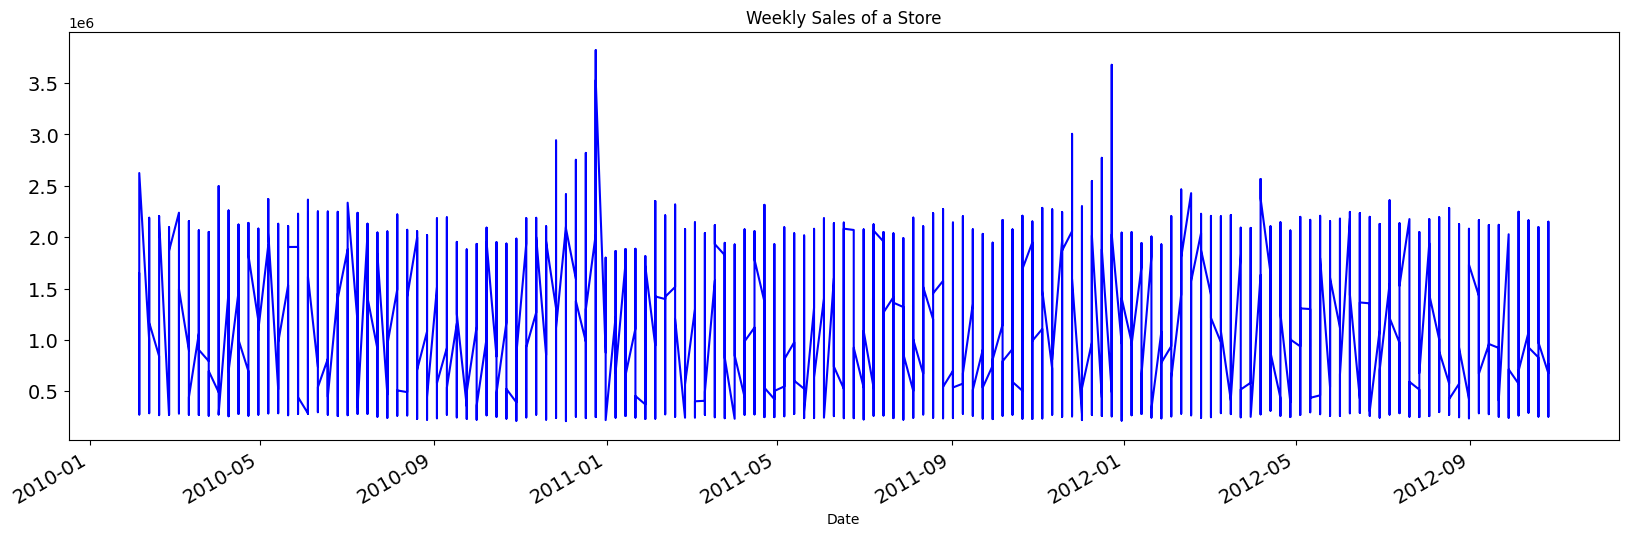

In [11]:
Walmart.Weekly_Sales.plot(figsize=(20,6), title= 'Weekly Sales of a Store', fontsize=14, color = 'blue')
plt.show()

>Question 1a: Correlation between weely sales and employment. which stores are mostly affected ?

In [12]:
# Calculate correlation
correlation = Walmart[['Weekly_Sales', 'Unemployment']].corr().loc['Weekly_Sales', 'Unemployment']
print(f'Correlation between Weekly Sales and Unemployment: {correlation}')

Correlation between Weekly Sales and Unemployment: -0.10617608965795235


**Insights**
<br> 
>**Summary**<br>
**Weak Impact:** In addition to the correlation calculation of -0.10617 above, the very low R-squared value from the report below suggests that the unemployment rate explains only a small portion of the variability in weekly sales. Other factors likely have a more significant impact on sales.<br>
**Negative Relationship:** There is a statistically significant negative relationship between unemployment and weekly sales, meaning higher unemployment rates are associated with lower sales.<br>
**Practical Implications:** While statistically significant, the low R-squared value implies that unemployment is not a major determinant of weekly sales in your model. It may be worthwhile to explore additional variables or more complex models to better understand the factors affecting weekly sales.

In [14]:
import statsmodels.api as sm

# Prepare the data for regression
X = Walmart[['Unemployment']]
X = sm.add_constant(X)  # Add constant term for the intercept
y = Walmart['Weekly_Sales']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     73.35
Date:                Fri, 16 Aug 2024   Prob (F-statistic):           1.34e-17
Time:                        22:09:33   Log-Likelihood:                -94316.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6433   BIC:                         1.886e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.302e+06   3.06e+04     42.503   

> Which stores are suffering the most?<br>
## Data Columns:
- **Store**: Store identifier
- **Weekly_Sales**: The sales amount for the store
- **Unemployment**: Unemployment rate affecting the store
- **Impact**: The calculated impact of the unemployment rate on the store's weekly sales (negative value indicates a decrease in sales)

## Interpretation:

### Impact of Unemployment on Sales:
- The **Impact** column shows how much sales are expected to decrease for each store as a result of a one-unit increase in the unemployment rate.
- The larger the negative number in the **Impact** column, the more severe the decrease in sales due to higher unemployment.

### Stores with the Most Severe Impact:
- Stores with the most negative **Impact** values are suffering the most from increased unemployment. These stores are seeing a significant decrease in sales due to higher unemployment rates.

## Detailed Analysis of Top 5 Stores:<br>

Store &nbsp; &nbsp;   Weekly_Sales &nbsp; &nbsp;  Unemployment  &nbsp; &nbsp;  Impact <br>
28 &nbsp; &nbsp; &nbsp; &nbsp;1.323522e+06  &nbsp; &nbsp;    13.116483  &nbsp; &nbsp;     -418985.768695    &nbsp; &nbsp;- **Interpretation**: Store 28 is heavily affected by unemployment, with a significant reduction in sales expected as unemployment rises. <br>
38 &nbsp; &nbsp;&nbsp; &nbsp;    3.857317e+05    &nbsp; &nbsp;  13.116483   &nbsp; &nbsp;    -418985.768695   &nbsp; &nbsp; - **Interpretation**: Store 38 faces a similar situation to Store 1, with considerable sales reduction due to higher unemployment. <br>
12  &nbsp; &nbsp; &nbsp; &nbsp;  1.009002e+06   &nbsp; &nbsp;   13.116483   &nbsp; &nbsp;    -418985.768695   &nbsp; &nbsp; - **Interpretation**: Store 12 faces a similar situation to Store 1, with considerable sales reduction due to higher unemployment.

## Summary:
- **High Impact Stores**: Stores with high negative values in the **Impact** column are the most affected by unemployment. These stores experience the largest decreases in sales as unemployment rises.
- **Consistent Impact Across Stores**: Many stores show similar impacts when unemployment rates are high, indicating that the effect of unemployment on sales is substantial across different stores.
- **Sales and Unemployment Relationship**: The data underscores a strong inverse relationship between unemployment and sales for these stores. High unemployment rates are associated with lower sales, impacting stores with varying degrees of severity.

## Actionable Insights:
- **Targeted Support**: Stores experiencing severe impacts might benefit from targeted support during times of high unemployment, such as promotions or financial assistance.
- **Further Analysis**: Investigating additional factors that could influence sales and their interaction with unemployment might provide a more comprehensive understanding of the challenges faced by these stores.


In [15]:
# Group by store and calculate the average unemployment rate and weekly sales
Walmartstore_group = Walmart.groupby('Store').agg({
    'Weekly_Sales': 'mean',
    'Unemployment': 'mean'
}).reset_index()

# Calculate the impact of unemployment on sales for each store
unemployment_coeff = model.params['Unemployment']
Walmartstore_group['Impact'] = Walmartstore_group['Unemployment'] * unemployment_coeff

# Identify the stores most affected by unemployment
most_affected_stores = Walmartstore_group.sort_values(by='Impact', ascending=True)
print(most_affected_stores)


    Store  Weekly_Sales  Unemployment         Impact
27     28  1.323522e+06     13.116483 -418985.768695
37     38  3.857317e+05     13.116483 -418985.768695
11     12  1.009002e+06     13.116483 -418985.768695
42     43  6.333247e+05      9.934804 -317351.970490
33     34  9.667816e+05      9.934804 -317351.970490
28     29  5.394514e+05      9.806385 -313249.805405
17     18  1.084718e+06      8.838301 -282325.860422
34     35  9.197250e+05      8.788573 -280737.399525
44     45  7.859814e+05      8.648748 -276270.900349
13     14  2.020978e+06      8.648748 -276270.900349
6       7  5.706173e+05      8.585734 -274258.015924
31     32  1.166568e+06      8.585734 -274258.015924
32     33  2.598617e+05      8.533154 -272578.415658
23     24  1.356755e+06      8.447014 -269826.810915
41     42  5.564039e+05      8.362965 -267141.997031
9      10  1.899425e+06      8.362965 -267141.997031
21     22  1.028501e+06      8.069371 -257763.577356
26     27  1.775216e+06      8.001748 -255603.

> Question 1b: Does weekly sales show a seasonal trend. When and what could be the reason?

From the plot<br>

<br> 1. There is a very slight element of seasonality in the weekly sales , weekly sales starts to peak towards the end of the year and reach its peak by January of each year and then falls shortly in the same month. 
<br> 2. Some spikes in sales in March and May of each year too
<br> 3. The seasonality in the weekly sales may be a result in the flunctuations in temperature, CPI, Unemployment and store location (they all have negative correlation with weekly sales) based on the correlation heatmap

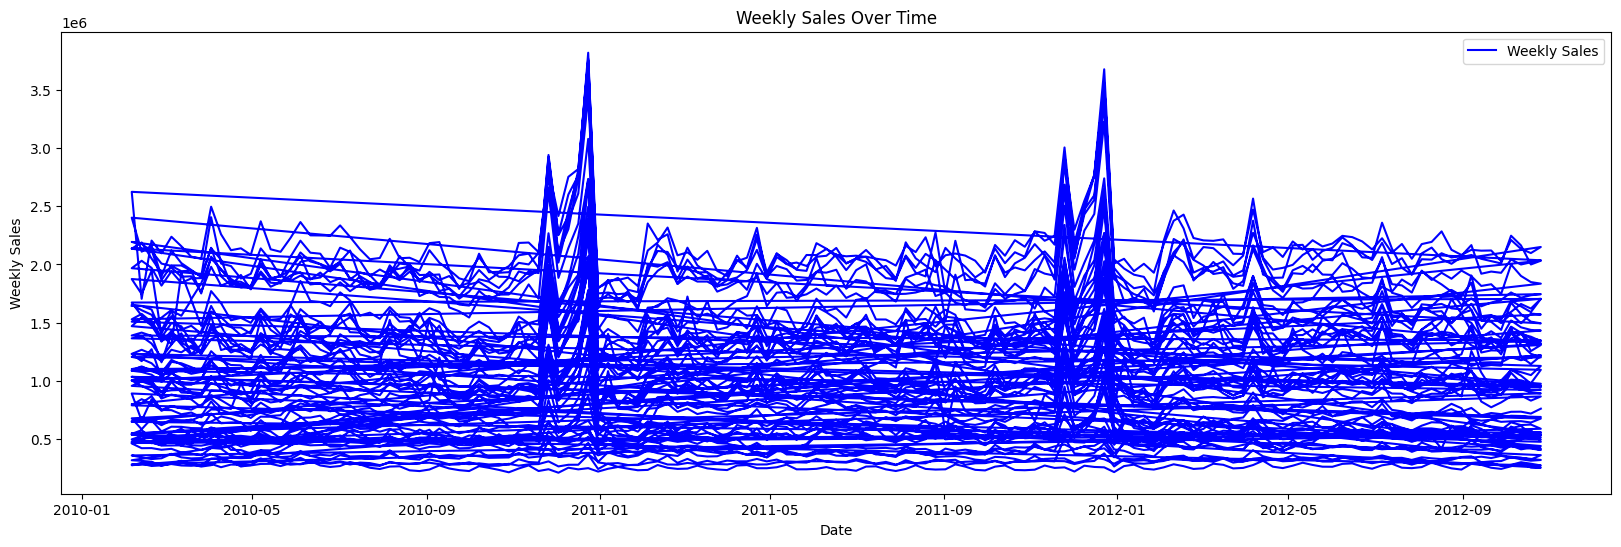

In [44]:
# Plotting weekly sales over time
plt.figure(figsize=(20, 6))
plt.plot(Walmart.index, Walmart['Weekly_Sales'], label='Weekly Sales', color='blue')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

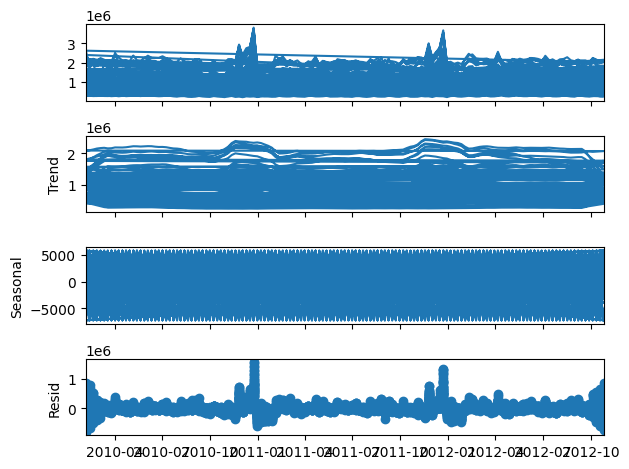

In [22]:

decomposition = seasonal_decompose(Walmart[['Weekly_Sales']], period=52).plot()

In [87]:
mean_log = Walmart4.rolling(window=12).mean()
std_log = Walmart4.rolling(window=12).std()

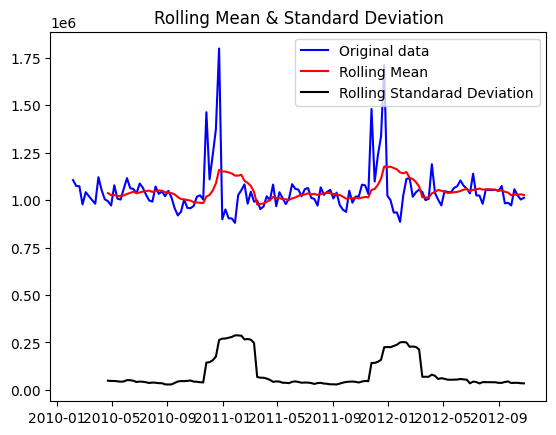

In [88]:
plt.plot(Walmart4,color="blue",label="Original data")
plt.plot(mean_log,color="red",label="Rolling Mean")
plt.plot(std_log,color="black",label="Rolling Standarad Deviation")
plt.legend(loc="best")
plt.title("Rolling Mean & Standard Deviation")
plt.show()

In [52]:
#Autocorrelation

from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


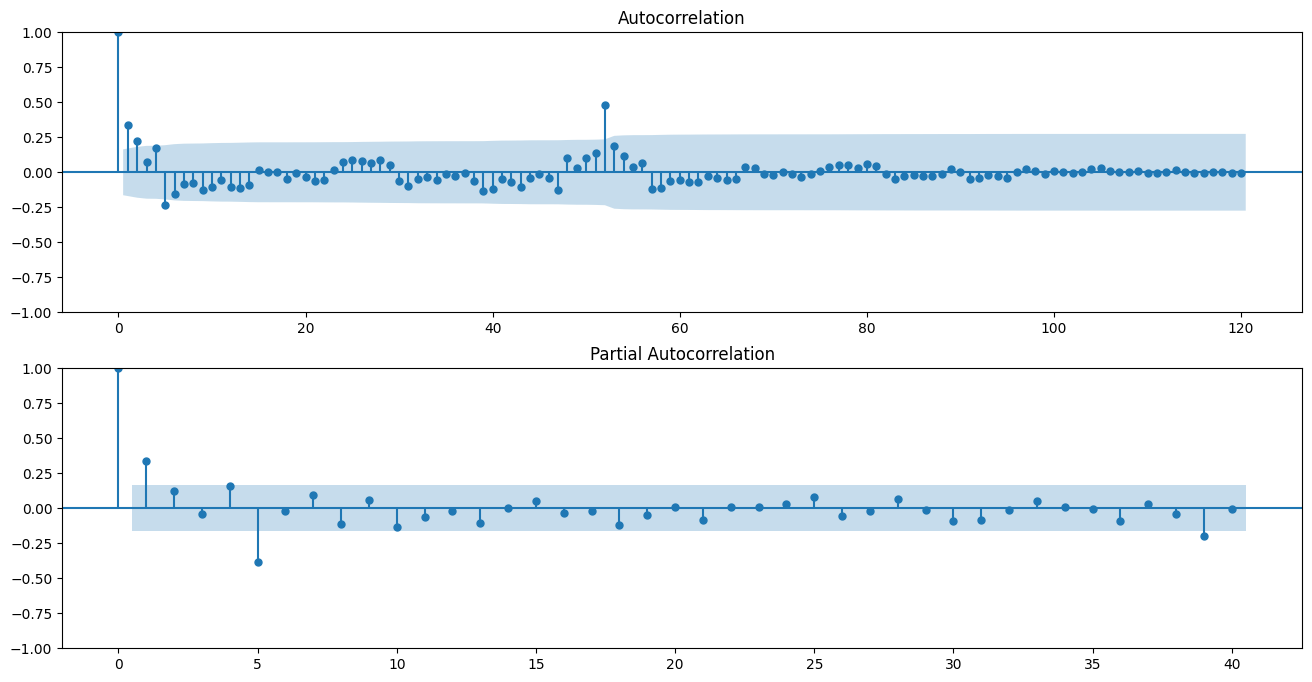

In [89]:


# Assign Walmart4 dataframe to 'time_series' dataframe
time_series = Walmart4 

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(16, 8))
plot_acf(time_series, lags=120, ax=ax[0])
plot_pacf(time_series, lags=40, ax=ax[1])
plt.show()


**Insight**<br>

- **Significant Autocorrelation at Lag 0**: The plot starts with a very high autocorrelation (close to 1) at lag 0, which is expected because a time series is perfectly correlated with itself.

- **Pattern of Decay**: After lag 0, the autocorrelation decreases but shows fluctuations. The pattern of ups and downs suggests some periodicity or seasonality in the data, though not perfectly regular.

- **Seasonal Patterns**: The ACF doesn't show sharp spikes at regular intervals, which would indicate a strong and regular seasonal component. Instead, the autocorrelations appear to fluctuate more gradually, suggesting a weaker or less regular seasonal pattern.

- **Long Memory**: The autocorrelations persist for many lags (beyond lag 6000), which suggests that past values have a long-lasting influence on future values. This could imply that the series has long-term dependencies or trends.


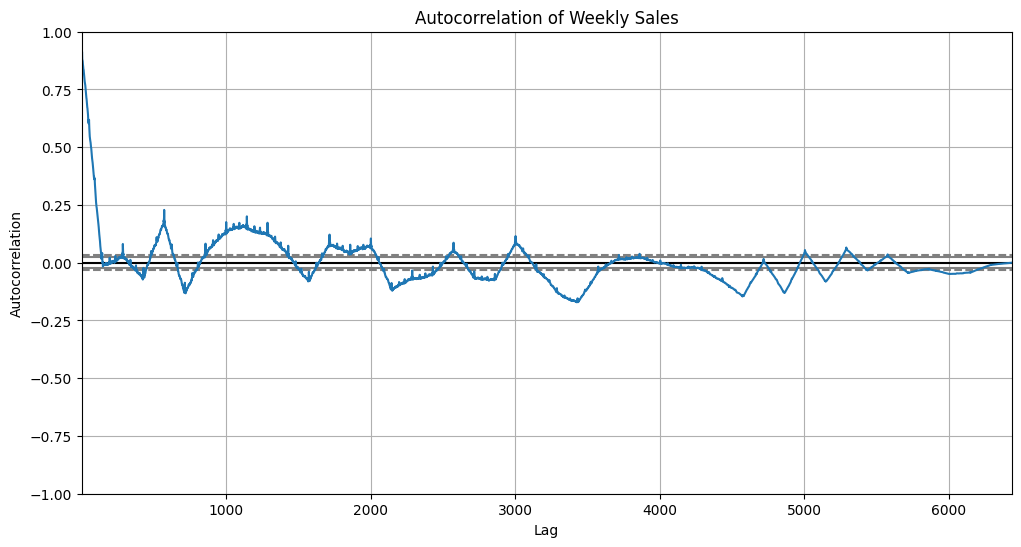

In [61]:
from pandas.plotting import autocorrelation_plot

# Plot autocorrelation
plt.figure(figsize=(12, 6))
autocorrelation_plot(Walmart['Weekly_Sales'])
plt.title('Autocorrelation of Weekly Sales')
plt.show()


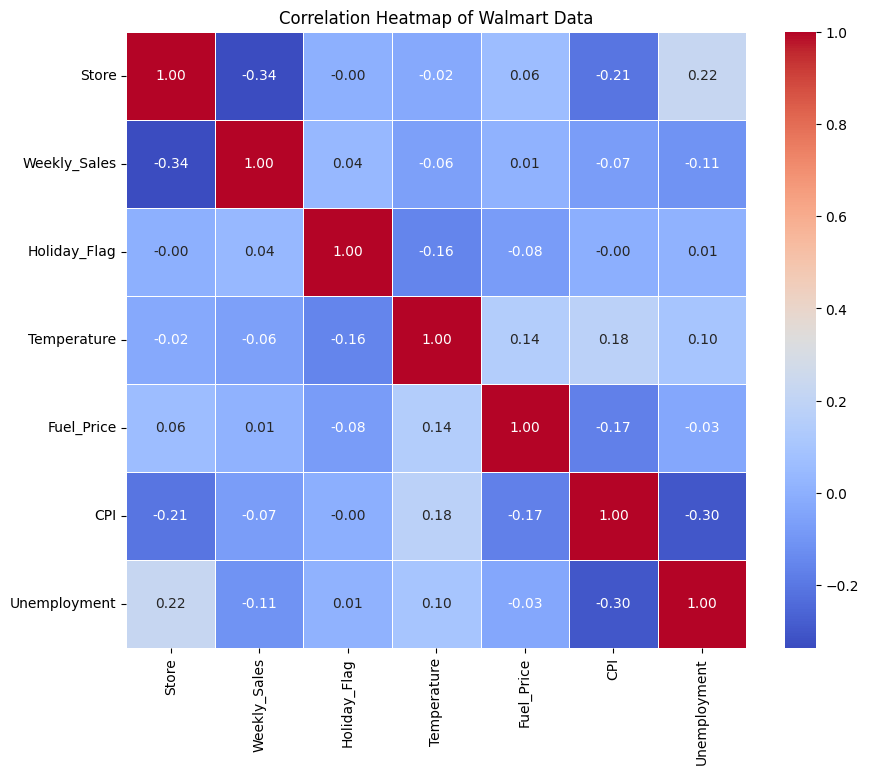

In [66]:
# Create a plot figsize
plt.figure(figsize=(10, 8))

# Calculate the correlation matrix
corr_matrix = Walmart.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap of Walmart Data')

# Display the heatmap
plt.show()

Question 1c. Does temperature affect weekly sales in any manner ?
<br>
>**Insight**<br>
From the correlation heat map, temperature has a -0.06 correlation with weekly sales. The aabsolute value of the correlation is close to zero meaning a weak correlation. The negative sign indicates that, in general, as temperature increases, weekly sales tend to slightly decrease, but the relationship is so weak that it might not be practically significant. The decrease in weekly sales with increasing temperature is minimal and could be due to random variations rather than a true underlying trend. Given the low magnitude of −0.06, it's possible that other factors have a much stronger influence on weekly sales than temperature does. It might be worth exploring other variables or using more advanced methods to detect non-linear relationships or interactions between variables.

Question 1d: How is CPI affecting weekly sales of various stores ?

> Insights <br>

CPI has weak negative correlation of -0.07 to the weekly sales from the heat map 
# Summary Analysis: CPI vs. Weekly Sales for Various Stores

## General Trend:
- The scatter plot shows a wide range of CPI values and their corresponding weekly sales for different stores. The data points are spread out, indicating variability in weekly sales across different CPI levels.

## Clusters of Data:
- There are two main clusters of CPI values where data points are concentrated:
  - **First Cluster**: CPI values between approximately 120 and 150.
  - **Second Cluster**: CPI values between approximately 180 and 220.
- Within these clusters, the weekly sales are distributed across various levels, suggesting that sales are not solely dependent on CPI but are influenced by other factors as well.

## Relationship Between CPI and Weekly Sales:
- **First Cluster (CPI 120-150)**:
  - Most stores exhibit higher weekly sales when the CPI is lower (around 120-150). The sales seem to be more tightly packed, indicating that many stores have a consistent sales range within this CPI band.
- **Second Cluster (CPI 180-220)**:
  - In this range, the sales are more dispersed, with some stores showing higher sales while others show lower sales. The variability in weekly sales suggests that the relationship between CPI and sales is not linear and may be influenced by other store-specific factors.

## Store-Level Observations:
- Some stores (e.g., Stores 1, 2, 3) appear to have higher weekly sales across a wide range of CPI values, indicating strong performance regardless of CPI fluctuations.
- Other stores may exhibit lower or more volatile weekly sales, particularly in the higher CPI range (180-220).

## Overall Interpretation:
- There is no clear, direct correlation between CPI and weekly sales across all stores. The plot suggests that CPI impacts each store differently, with some stores maintaining strong sales across varying CPI levels, while others may struggle or experience fluctuations. This could be due to factors like store location, customer demographics, or the availability of promotions.
- The plot emphasizes the need for a more detailed analysis, possibly considering other variables, to fully understand the relationship between CPI and weekly sales for each store.


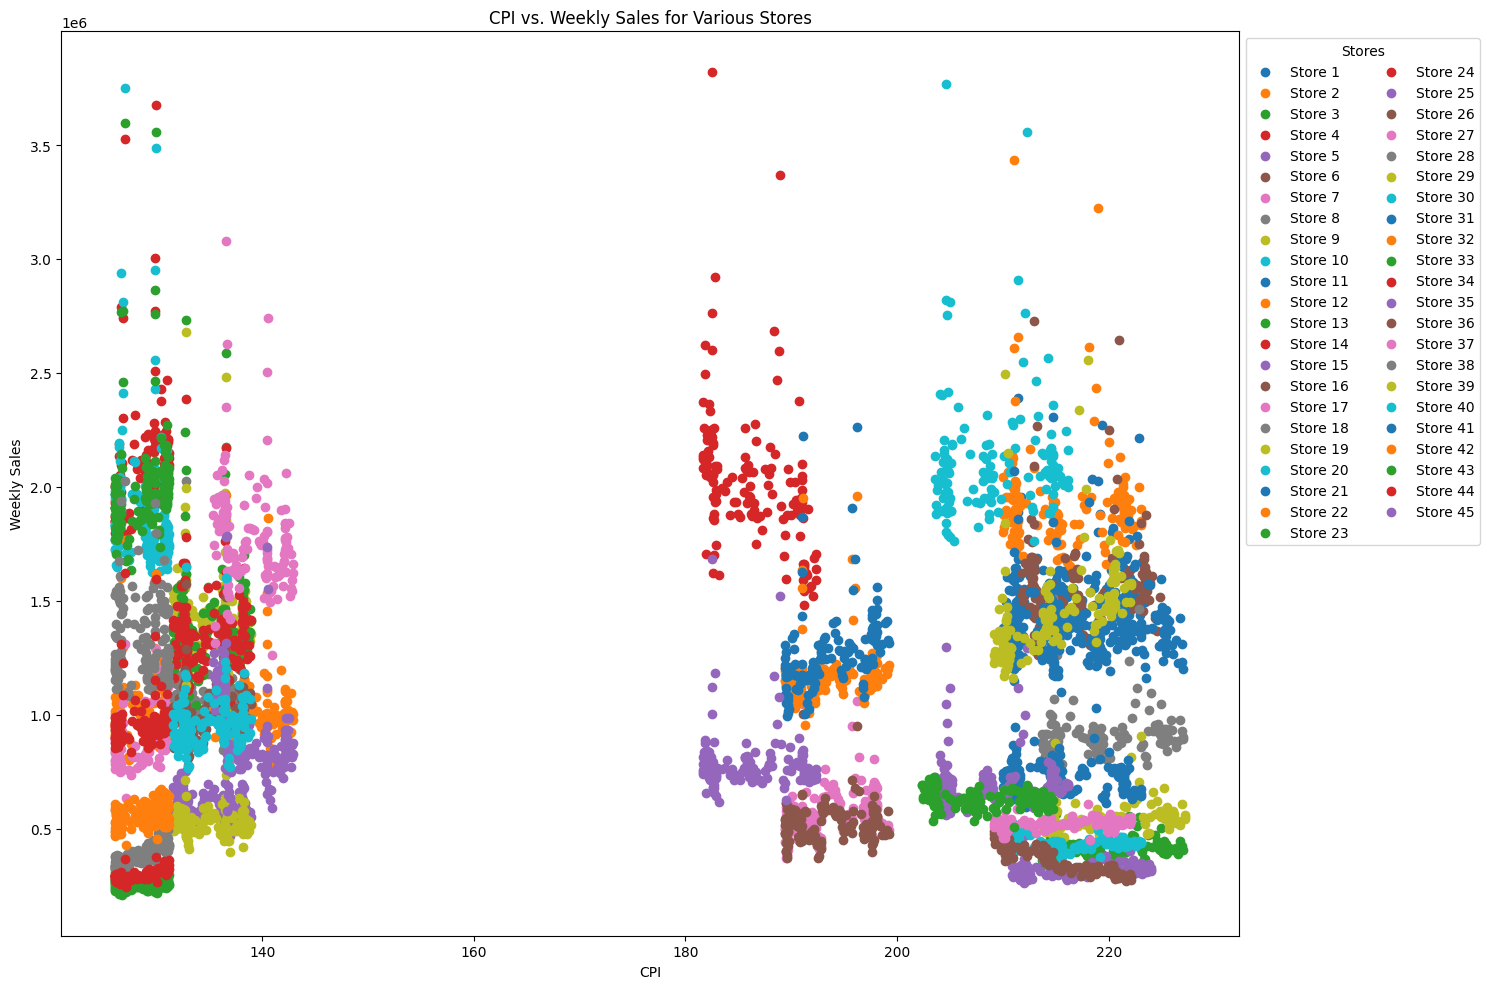

In [68]:


# Plotting CPI vs. Weekly Sales for each store
stores = Walmart['Store'].unique()

plt.figure(figsize=(15, 10))
for store in stores:
    store_data = Walmart[Walmart['Store'] == store]
    plt.scatter(store_data['CPI'], store_data['Weekly_Sales'], label=f'Store {store}')

plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.title('CPI vs. Weekly Sales for Various Stores')

# Repositioning the legend to the upper left corner, outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Stores", ncol=2)
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()



Question 1e: What is the top performing store according to historical data 

In [82]:
# Find the top-performing store based on Sales
top_store = Walmart.loc[Walmart['Weekly_Sales'].idxmax()]

In [93]:
# Sort by weekly sales in descending order
Top_store_sorted = top_store.sort_values(by='Weekly_Sales', ascending=False)
Top_store_sorted

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-12-24     14    3818686.45             0        30.59       3.141   
2010-12-24     20    3766687.43             0        25.17       3.141   
2010-12-24     10    3749057.69             0        57.06       3.236   
2010-12-24     13    3595903.20             0        34.90       2.846   
2010-12-24      4    3526713.39             0        43.21       2.887   
2010-12-24      2    3436007.68             0        49.97       2.886   
2010-12-24     27    3078162.08             0        31.34       3.309   
2010-12-24     23    2734277.10             0        22.96       3.150   
2010-12-24      6    2727575.18             0        55.07       2.886   
2010-12-24     19    2678206.42             0        26.05       3.309   
2010-12-24     39    2495489.25             0        58.86       2.886   
2010-12-24      1    2387950.20             0        52.33       2.886   
2010-12-24     24    2386015.75             0        27.74       3.309   
2010-12-24     11    2306265.36             0        59.33       2.886   
2010-12-24     41    2225016.73             0        29.81       2.781   
2010-12-24     31    2068942.97             0        51.29       2.886   
2010-12-24     18    2027507.15             0        28.16       3.150   
2010-12-24     28    2026026.39             0        52.02       3.236   
2010-12-24     22    1962445.04             0        29.76       3.150   
2010-12-24     32    1949183.14             0        30.72       2.781   
2010-12-24     35    1779236.54             0        31.34       3.141   
2010-12-24     12    1768249.89             0        52.02       3.236   
2010-12-24     45    1682862.03             0        30.59       3.141   
2010-12-24     40    1648829.18             0        24.18       3.150   
2010-12-24     34    1620748.25             0        42.74       2.887   
2010-12-24     21    1587257.78             0        51.29       2.886   
2010-12-24     26    1573982.47             0        21.81       3.150   
2010-12-24      8    1511641.09             0        45.67       2.886   
2010-12-24     15    1368318.17             0        25.07       3.309   
2010-12-24     17    1309226.79             0        26.58       2.846   
2010-12-24     25    1295391.19             0        22.94       3.141   
2010-12-24     29    1130926.79             0        29.76       3.150   
2010-12-24      7    1045124.88             0        26.04       2.781   
2010-12-24     16    1004730.69             0        32.46       2.781   
2010-12-24      9     873347.55             0        50.93       2.886   
2010-12-24     43     656637.63             0        57.15       2.886   
2010-12-24      3     605990.41             0        57.16       2.886   
2010-12-24     37     576809.92             0        59.10       2.886   
2010-12-24     42     555075.27             0        57.06       3.236   
2010-12-24     30     519354.88             0        51.29       2.886   
2010-12-24      5     466010.25             0        55.01       2.886   
2010-12-24     36     422093.59             0        59.10       2.863   
2010-12-24     38     369106.72             0        52.02       3.236   
2010-12-24     44     365098.24             0        34.90       2.846   
2010-12-24     33     249246.80             0        60.43       3.236   

                   CPI  Unemployment  
Date                                  
2010-12-24  182.544590         8.724  
2010-12-24  204.637673         7.484  
2010-12-24  126.983581         9.003  
2010-12-24  126.983581         7.795  
2010-12-24  126.983581         7.127  
2010-12-24  211.064660         8.163  
2010-12-24  136.597273         8.021  
2010-12-24  132.747742         5.287  
2010-12-24  212.916508         7.007  
2010-12-24  132.747742         8.067  
2010-12-24  210.180560         8.476  
2010-12-24  211.405122    

Question 1f: What is the worst performing store according to historical data , and what is the difference between the worst and top performing store ?

In [87]:
# Find the top-performing store based on Sales
worst_store = Walmart.loc[Walmart['Weekly_Sales'].idxmin()]

In [94]:
worst_store_sorted=worst_store.sort_values(by='Weekly_Sales', ascending=True)
worst_store_sorted

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-12-03     33     209986.25             0        52.82       3.041   
2010-12-03     44     264214.12             0        25.80       2.812   
2010-12-03      5     344490.88             0        51.31       2.708   
2010-12-03     38     351925.36             0        43.33       3.041   
2010-12-03     36     360266.09             0        54.44       2.694   
2010-12-03     30     407112.22             0        50.43       2.708   
2010-12-03      3     476420.77             0        53.76       2.708   
2010-12-03     42     500250.80             0        51.17       3.041   
2010-12-03     37     508213.14             0        54.44       2.708   
2010-12-03     16     512260.59             0        23.68       2.712   
2010-12-03      7     552811.62             0        21.88       2.712   
2010-12-03     43     557543.62             0        44.56       2.708   
2010-12-03      9     578164.82             0        49.89       2.708   
2010-12-03     29     642678.53             0        39.42       3.065   
2010-12-03     15     754134.95             0        36.00       3.200   
2010-12-03     21     829210.73             0        50.43       2.708   
2010-12-03     45     879244.90             0        40.93       3.046   
2010-12-03     25     885572.96             0        32.41       3.046   
2010-12-03     17     926573.81             0        22.47       2.812   
2010-12-03      8     952766.93             0        42.85       2.708   
2010-12-03     35     982598.88             0        41.81       3.046   
2010-12-03     40    1000582.06             0        33.60       3.065   
2010-12-03     34    1001512.21             0        34.70       2.727   
2010-12-03     26    1016143.64             0        27.73       3.065   
2010-12-03     12    1069533.17             0        43.33       3.041   
2010-12-03     32    1200892.56             0        35.18       2.712   
2010-12-03     18    1211026.13             0        37.09       3.065   
2010-12-03     41    1220115.75             0        33.00       2.712   
2010-12-03     22    1230514.58             0        39.42       3.065   
2010-12-03     31    1338716.37             0        50.43       2.708   
2010-12-03     11    1380522.64             0        55.90       2.708   
2010-12-03     24    1413302.70             0        37.08       3.200   
2010-12-03     39    1431910.98             0        53.55       2.708   
2010-12-03     28    1447916.29             0        43.33       3.041   
2010-12-03      1    1548033.78             0        49.27       2.708   
2010-12-03     19    1615987.96             0        36.64       3.200   
2010-12-03     23    1617025.41             0        34.30       3.065   
2010-12-03      6    1677067.24             0        52.30       2.708   
2010-12-03     27    1884343.67             0        41.81       3.200   
2010-12-03      2    2015781.27             0        49.33       2.708   
2010-12-03     13    2083379.89             0        25.80       2.812   
2010-12-03      4    2102530.17             0        46.40       2.727   
2010-12-03     10    2251206.64             0        51.17       3.041   
2010-12-03     14    2258489.63             0        40.93       3.046   
2010-12-03     20    2416051.17             0        35.47       3.046   

                   CPI  Unemployment  
Date                                  
2010-12-03  126.731333         9.265  
2010-12-03  126.731333         7.610  
2010-12-03  212.161395         6.768  
2010-12-03  126.731333        14.313  
2010-12-03  210.376263         8.476  
2010-12-03  211.265543         8.163  
2010-12-03  214.915353         7.564  
2010-12-03  126.731333         9.003  
2010-12-03  210.376263         8.476  
2010-12-03  190.993144         6.986  
2010-12-03  190.993144         9.137  
2010-12-03  203.571429    

In [97]:
Diff_topstore_worststore=Top_store_sorted.iloc[0,1] - worst_store_sorted.iloc[0,1]

In [100]:
print( 'Top store weekly sales is:', Top_store_sorted.iloc[0,1])

Top store weekly sales is: 3818686.45


In [101]:
print( 'Worst store weekly sales is:',worst_store_sorted.iloc[0,1])

Worst store weekly sales is: 209986.25


In [103]:
print('Difference between top store annd worst store weekly sales is:', Diff_topstore_worststore)

Difference between top store annd worst store weekly sales is: 3608700.2


In [107]:
worst_store_perc_TopStore = (worst_store_sorted.iloc[0,1]/Top_store_sorted.iloc[0,1])*100
worst_store_perc_TopStore

5.498913114482075

In [111]:
print('worst store weekly sales is just ', worst_store_perc_TopStore, ' percentage of top store weekly sales')

worst store weekly sales is just  5.498913114482075  percentage of top store weekly sales


>Feature Engineering

Question 2 : use a predictive model to forecast the weekly sales for each store for the next 12 months 

> Test that the data is stationary using Augmented Dickey-Test ADT method

>Test for stationary 
<br> Since p-value is less than 0.05 , the data is stationary.

In [137]:
Walmart3

Weekly_Sales
Date                    
2010-02-05    1643690.90
2010-02-12    1641957.44
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-03-05    1554806.68
...                  ...
2012-09-28     713173.95
2012-10-05     733455.07
2012-10-12     734464.36
2012-10-19     718125.53
2012-10-26     760281.43

[6435 rows x 1 columns]

In [148]:
result = adfuller(Walmart3)
print(result)


if(result[1]>0.05):
  adf_statistic, p_value, used_lag, n_obs, critical_values, icbest = adf_test

  print("not stationary")
else:
  print("stationary")

(-4.624149498578299, 0.00011655869699901492, 34, 6400, {'1%': -3.4313721757424656, '5%': -2.8619917128968813, '10%': -2.5670104435791017}, 171522.33418043077)
stationary


>P is less than 0.05 so the data is stationary.

>Model Building
<br> 
1. Split the Data into Training and Testing Sets
Split the data into a training set and a test set (e.g., last 12 weeks for testing).

In [151]:

Walmart_Sales_Stores = Walmart[['Weekly_Sales', 'Store']]
Walmart_Sales_Stores

Weekly_Sales  Store
Date                           
2010-02-05    1643690.90      1
2010-02-12    1641957.44      1
2010-02-19    1611968.17      1
2010-02-26    1409727.59      1
2010-03-05    1554806.68      1
...                  ...    ...
2012-09-28     713173.95     45
2012-10-05     733455.07     45
2012-10-12     734464.36     45
2012-10-19     718125.53     45
2012-10-26     760281.43     45

[6435 rows x 2 columns]

In [152]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [156]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Store            MAE           RMSE         R²
0       1  203230.536189  209926.267919  -5.943887
1       2  161787.659083  171183.430984  -4.346798
2       3   61013.405882   62413.045015 -14.157072
3       4  266583.172664  275780.175977 -20.215757
4       5   53496.487514   54727.882951 -10.516068
5       6  217756.068807  227048.751006  -3.562842
6       7   97114.686037  103154.286817  -0.222401
7       8   60915.675730   68850.319480  -4.069875
8       9   83986.953627   86352.223114 -10.266413
9      10  237686.406699  250564.888582  -9.421668
10     11  192067.445884  202890.876402  -7.304536
11     12   86718.818009   92415.001177  -1.953918
12     13  260038.673164  273506.798824 -12.704165
13     14  469940.905195  493908.707887  -6.522749
14     15   67935.146725   74785.286890  -1.750181
15     16   43580.301544   48584.425409   0.250389
16     17   84633.851080   91111.920692  -0.247840
17     18  102019.313895  119260.816277  -3.172850
18     19  201604.863823  210652.305679  -5.743862
19     20  404086.667588  417670.063517 -15.103170
20     21   59088.372554   65364.631121  -1.416431
21     22  161958.807530  167671.678559  -8.237155
22     23  212380.379331  224336.053686  -3.075178
23     24  165186.594104  175383.649275  -2.262358
24     25  110544.034442  115078.924033 -10.950796
25     26   97559.359014  104349.282830  -1.458682
26     27  156900.313864  169502.299459  -1.133517
27     28  128189.018814  144615.545236  -0.572121
28     29   85497.127561   89873.635120  -4.491904
29     30   15909.942436   21259.328441  -2.710799
30     31   83812.833509   89220.634273  -3.827023
31     32  125983.922724  131256.374633 -10.221525
32     33   13427.693399   16362.560393   0.247300
33     34   71721.079807   77395.491328  -6.839596
34     35   49491.032048   61516.982860  -0.030191
35     36   25487.457546   28799.772663  -1.389775
36     37   18466.132612   23105.440639  -1.487980
37     38   50108.950980   55699.271425  -3.914076
38     39  294685.996720  302312.272124 -13.090296
39     40  128041.660824  133704.805669  -2.426702
40     41  122584.001719  131705.480732  -2.316360
41     42   25607.422689   33178.671196   0.463793
42     43   17467.004838   22155.304985   0.221147
43     44   11350.009893   13896.447822  -0.660176
44     45  116565.647773  121502.592425  -7.665077

> Model Building <br>
1. Split the dataFrame in 80% training and 20% test data.<br>
2. Use SARIMAX model accounting for seasonality to build the model. <br> 
3. Forecast weekly sales for 12 weeks for each store <br>
4. Evaluate the model performance 

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



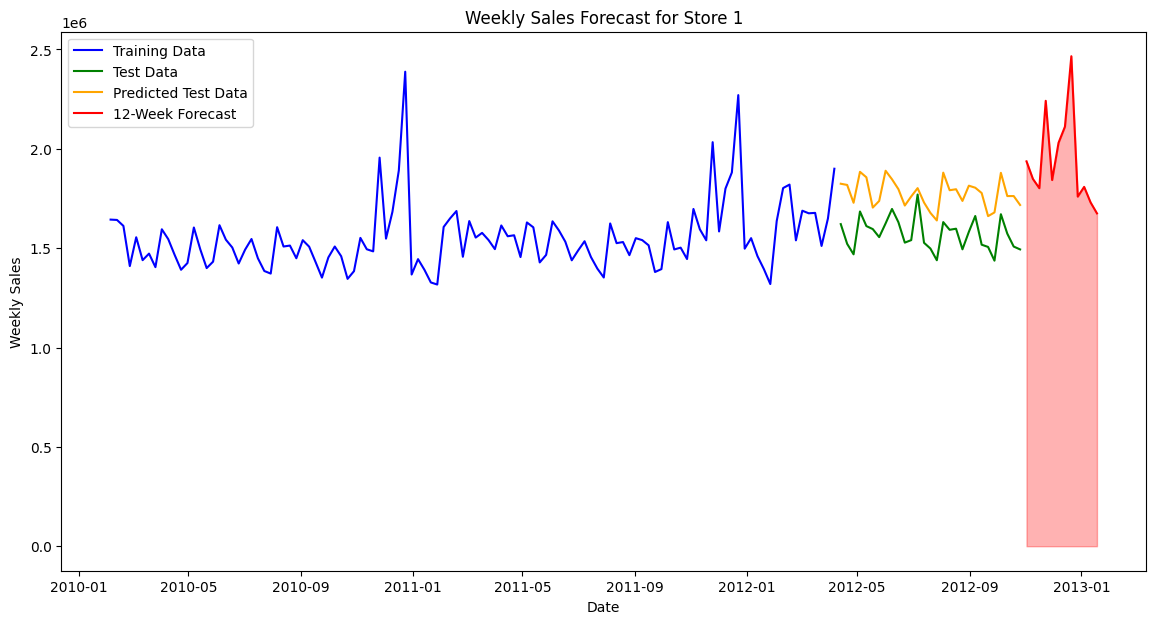

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



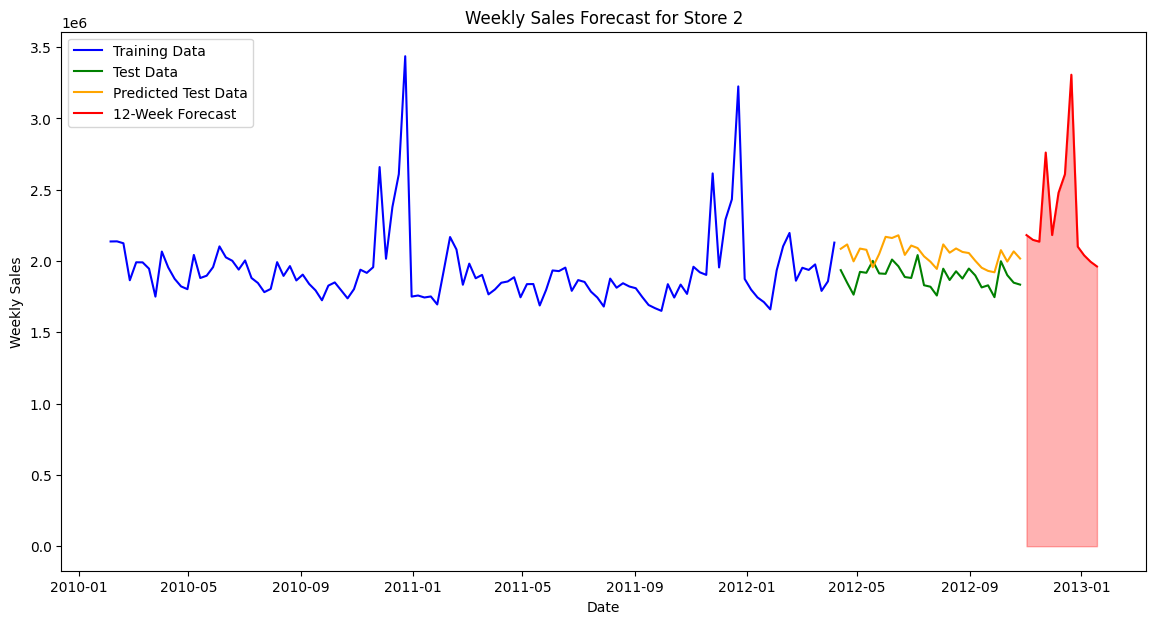

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



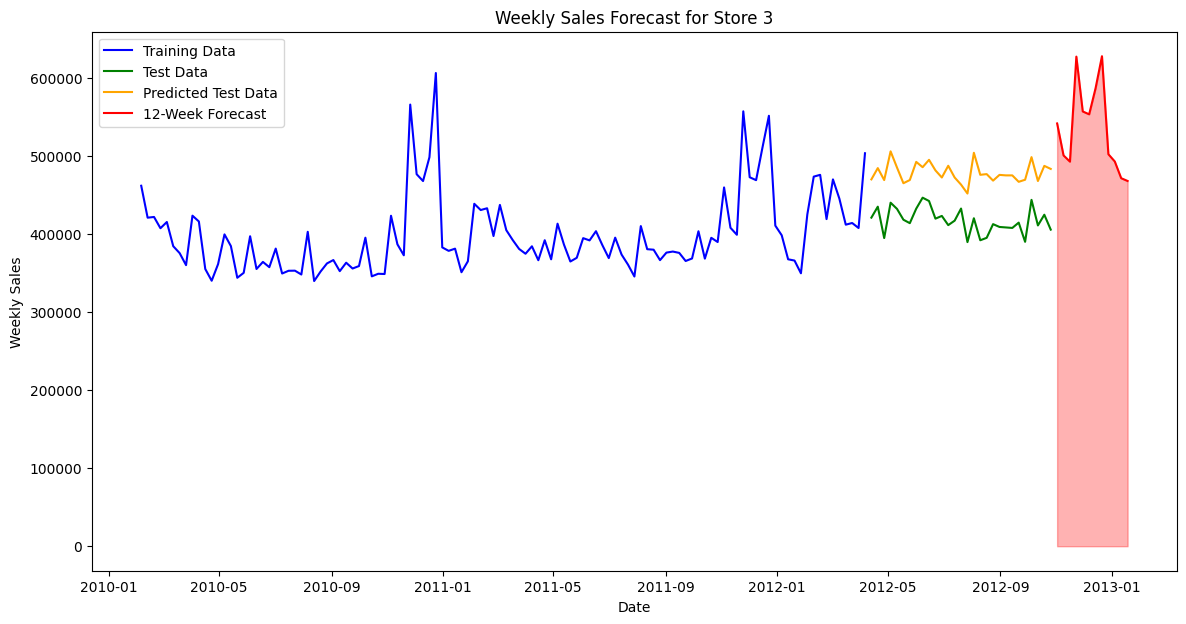

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



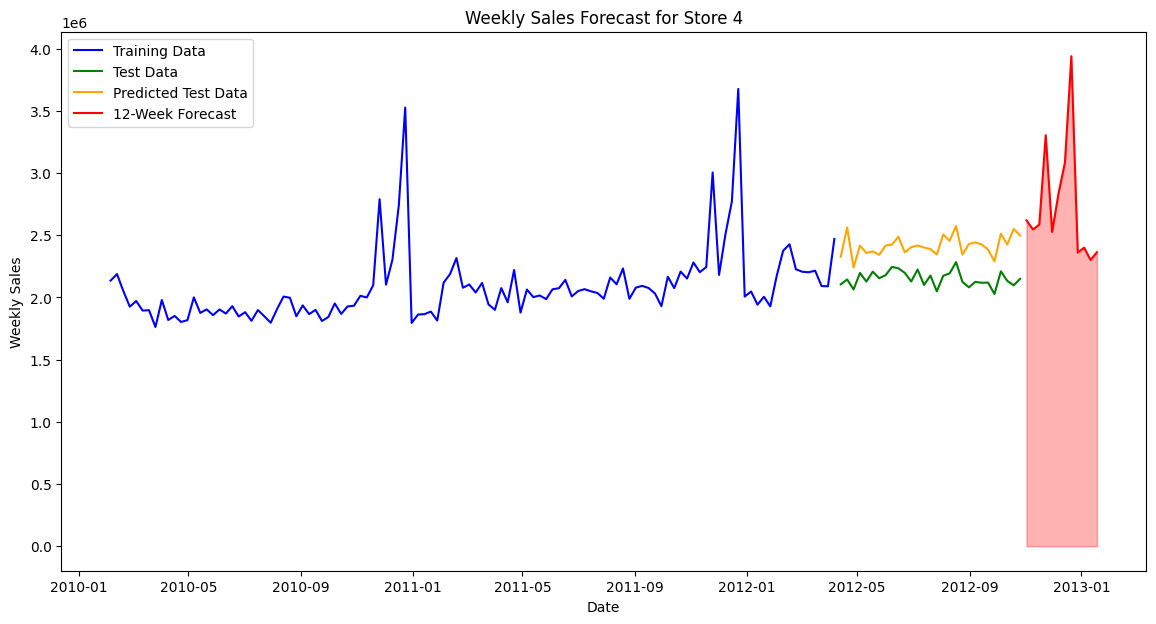

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



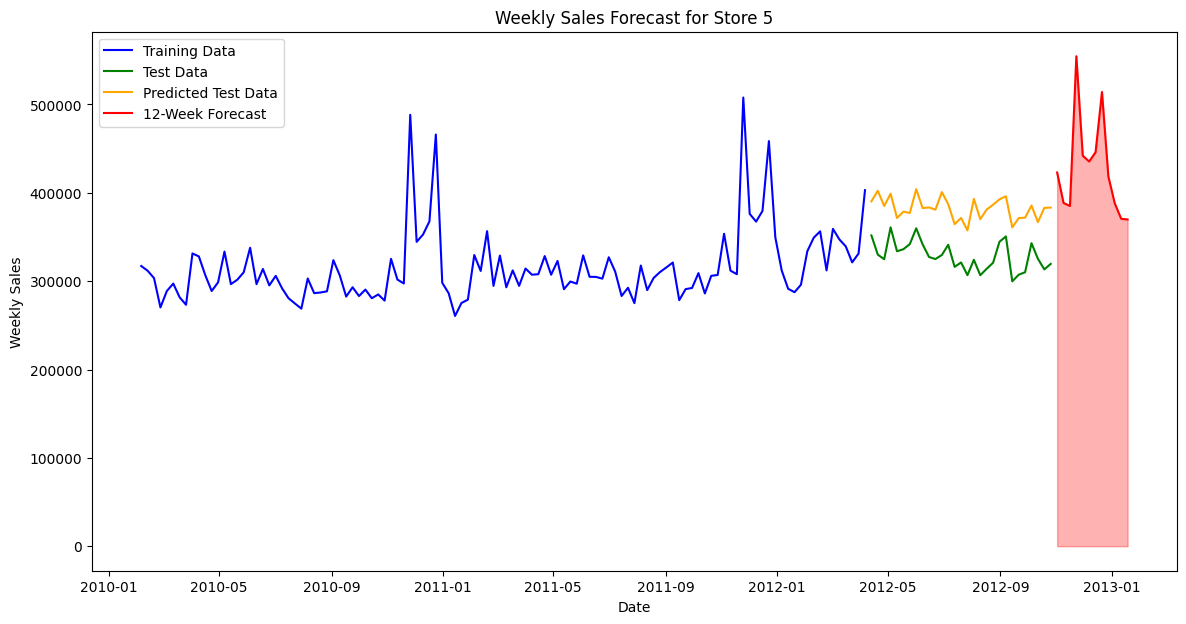

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



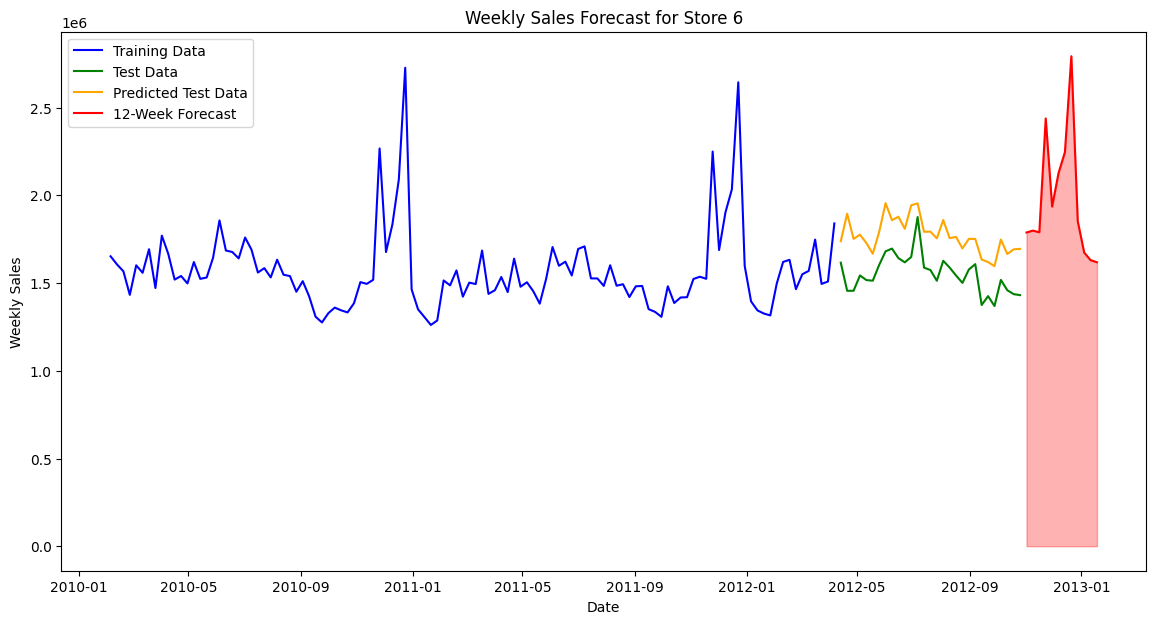

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



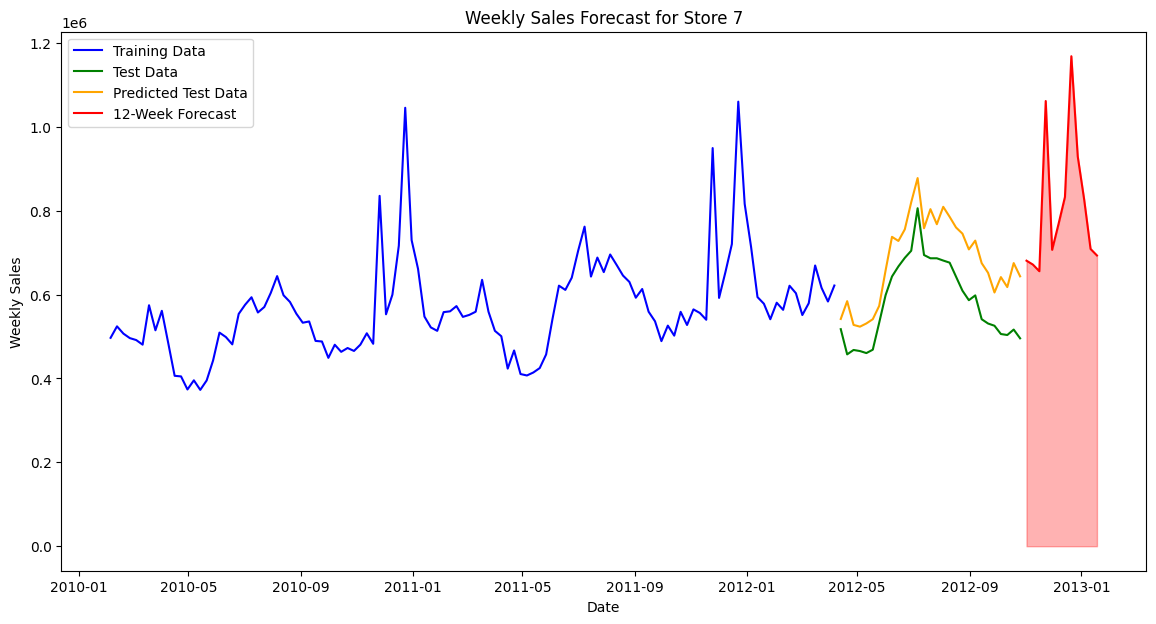

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



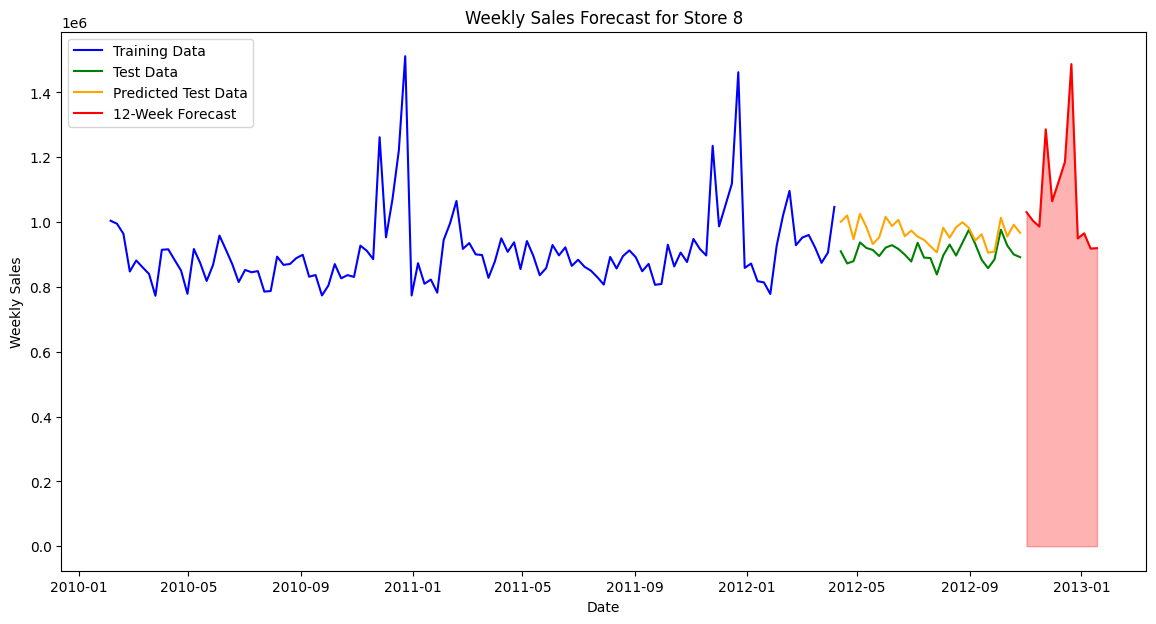

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



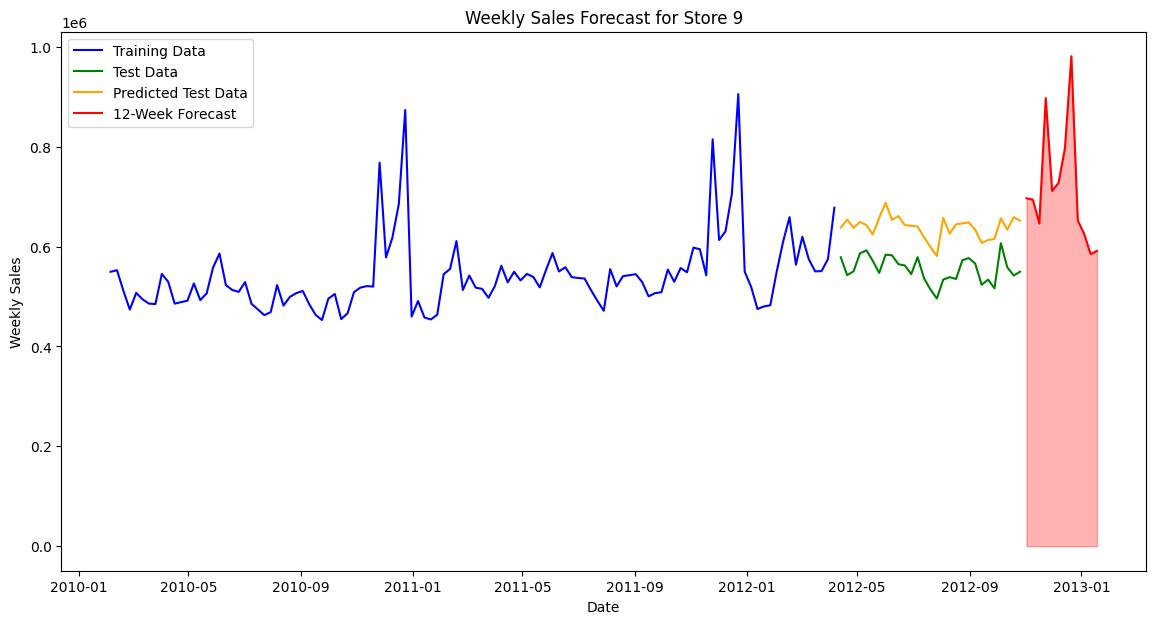

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



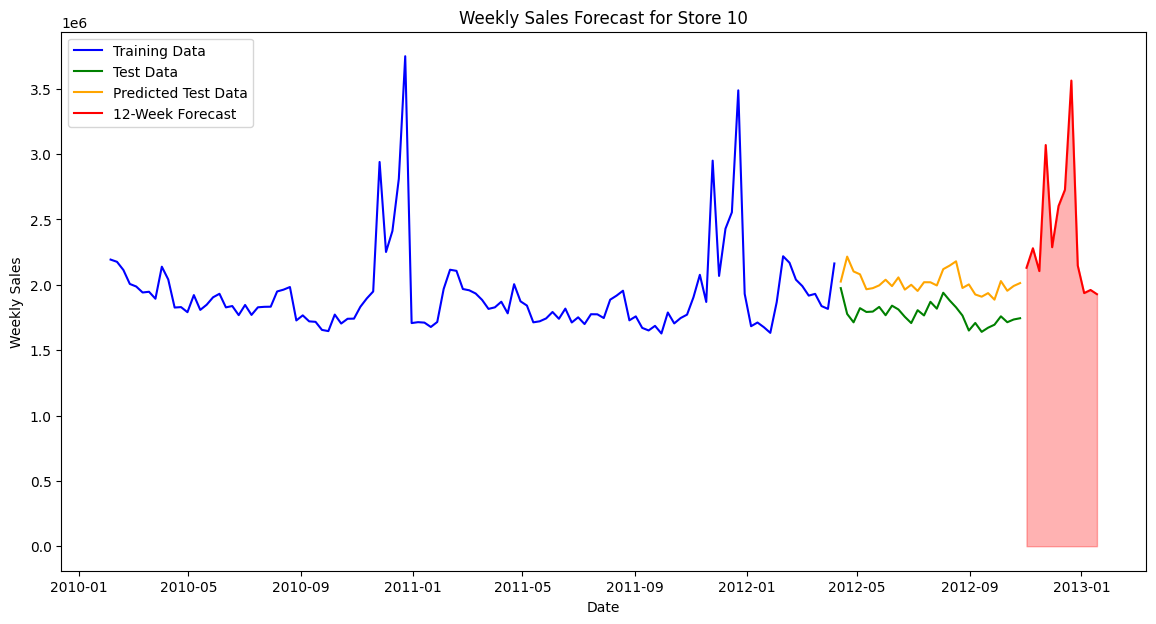

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



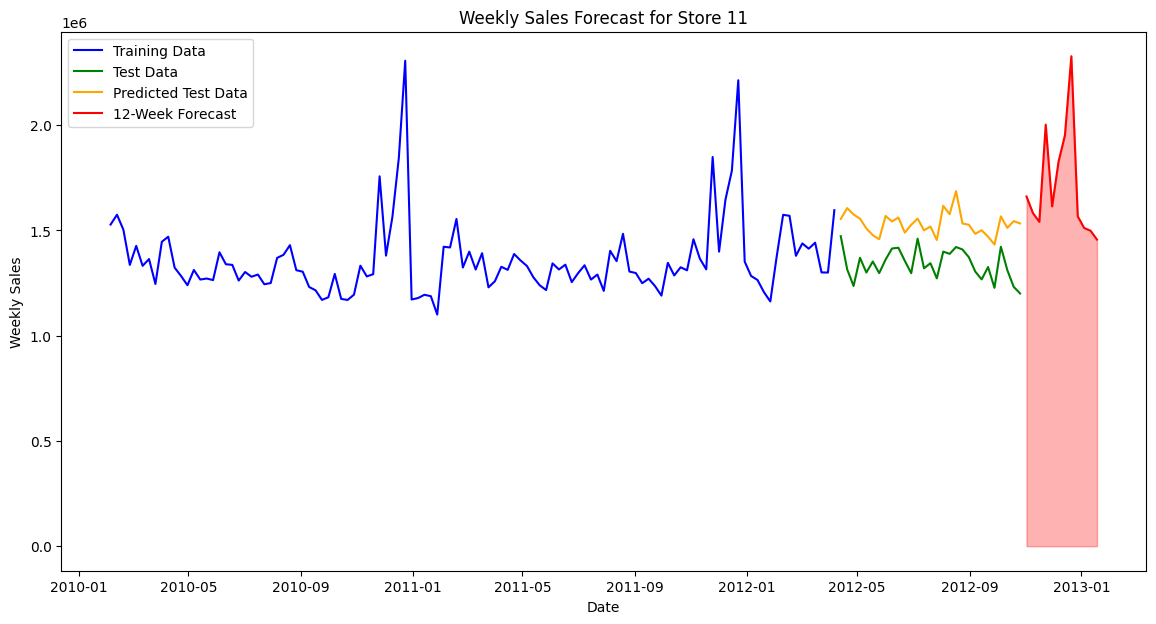

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



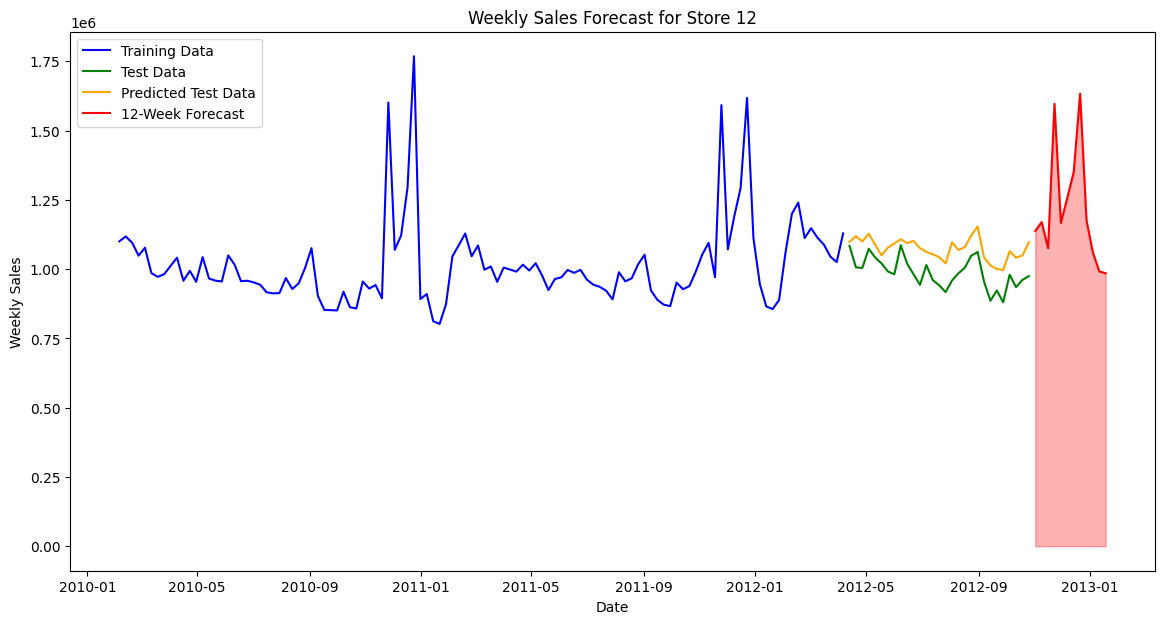

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



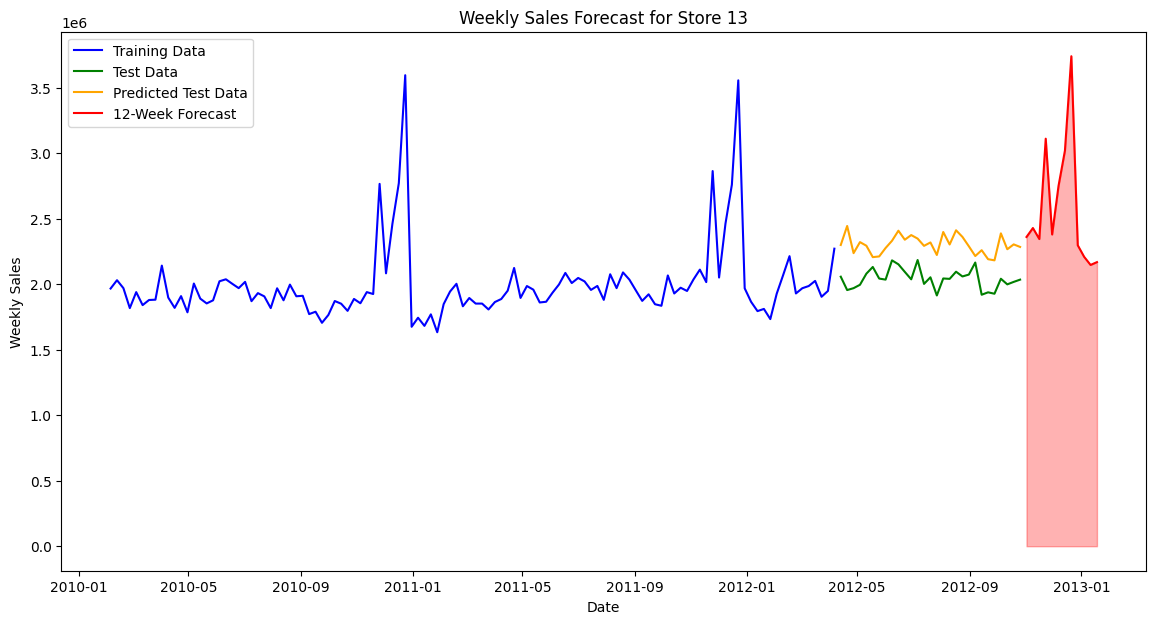

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



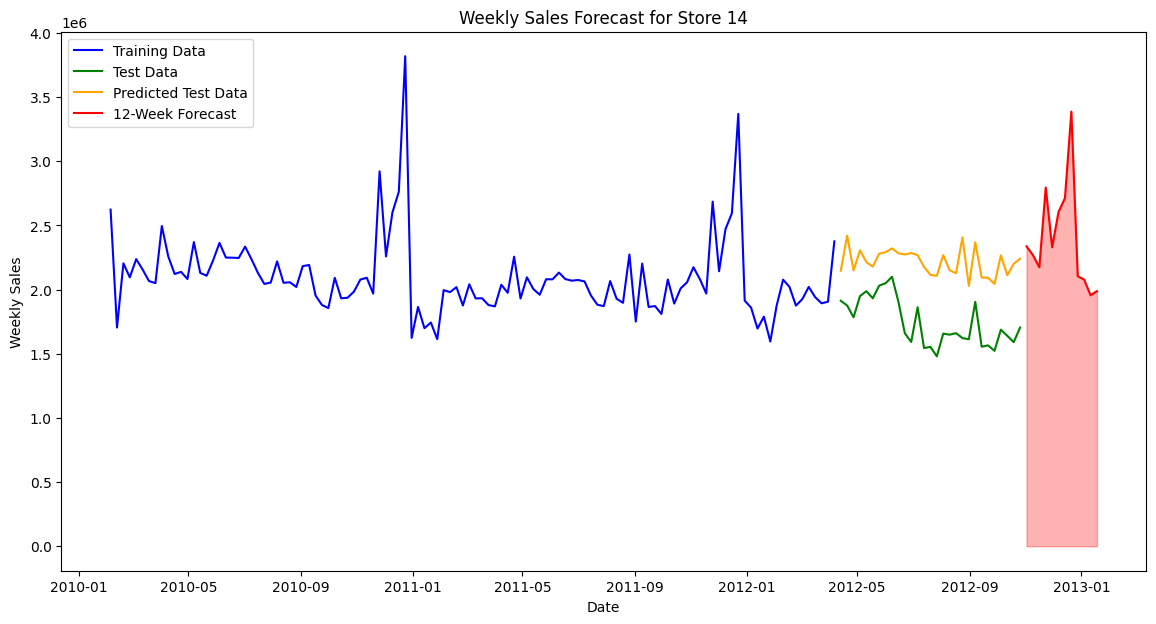

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



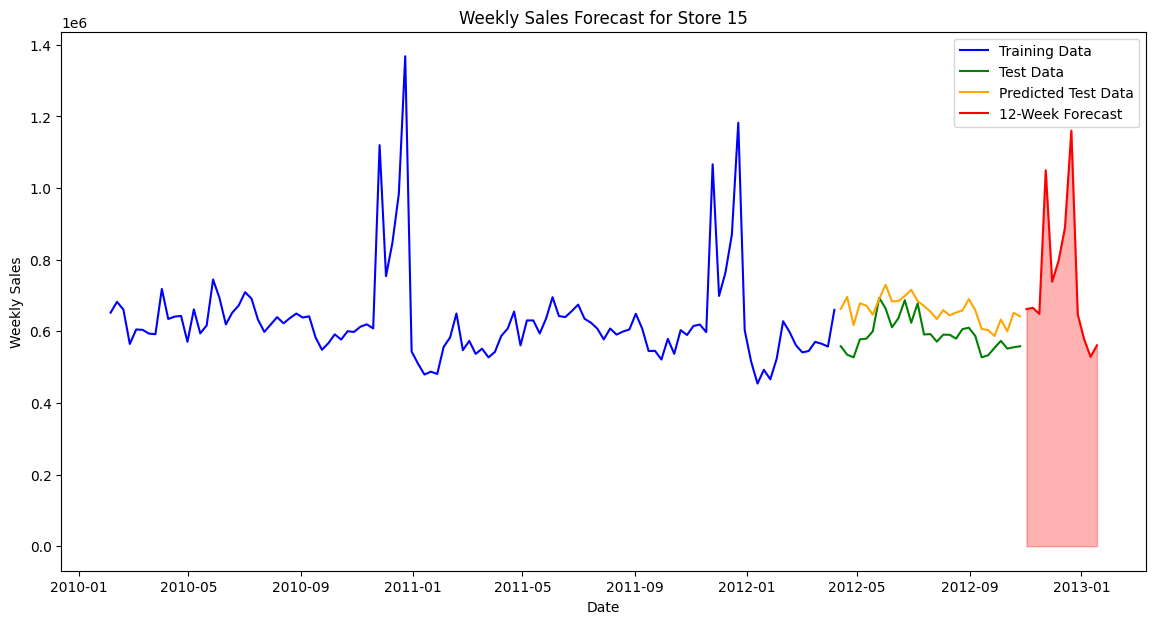

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



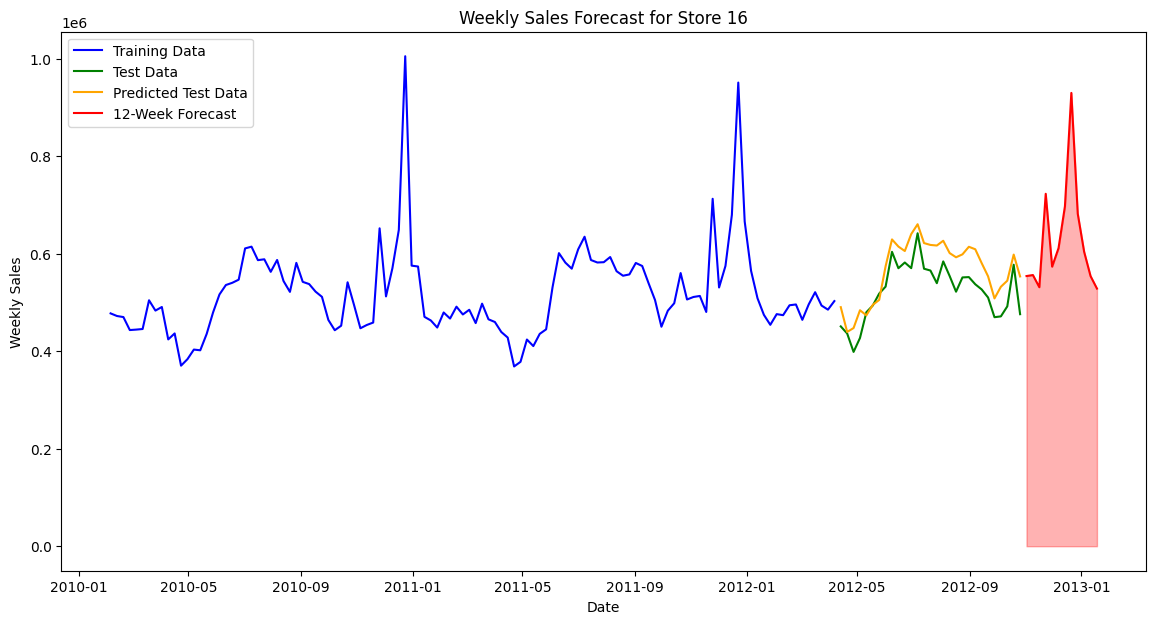

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



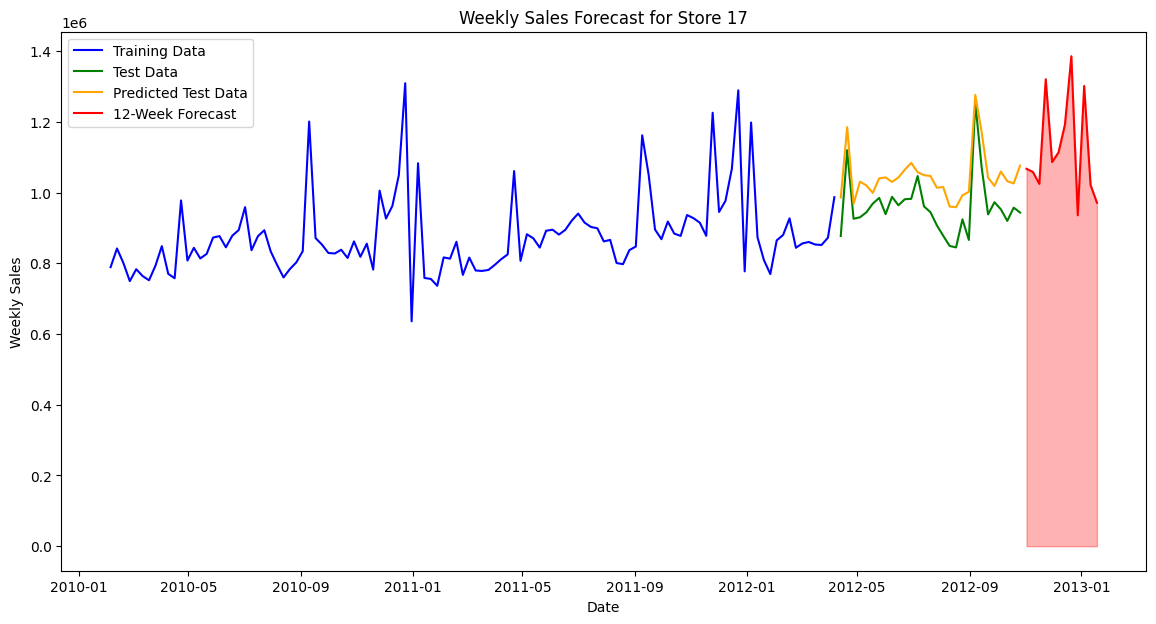

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



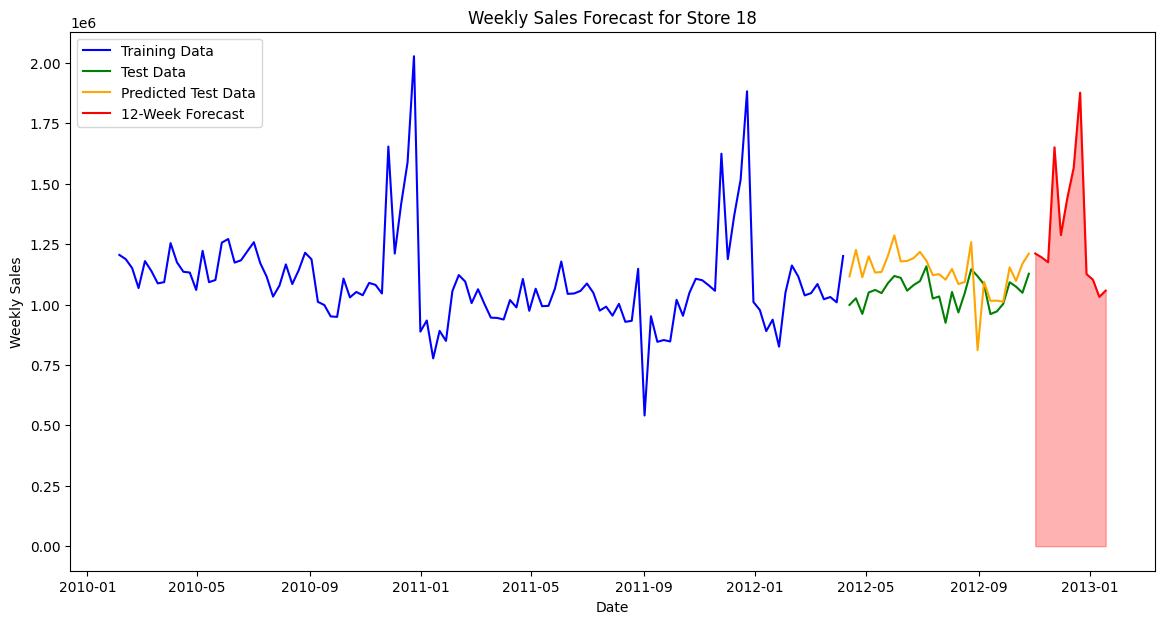

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



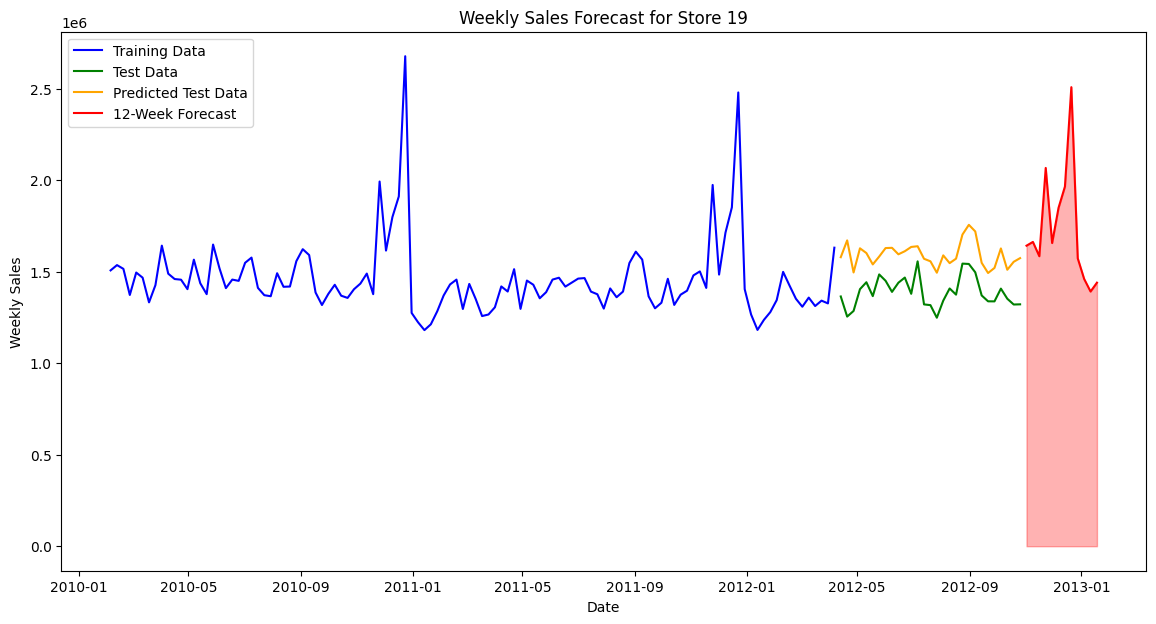

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



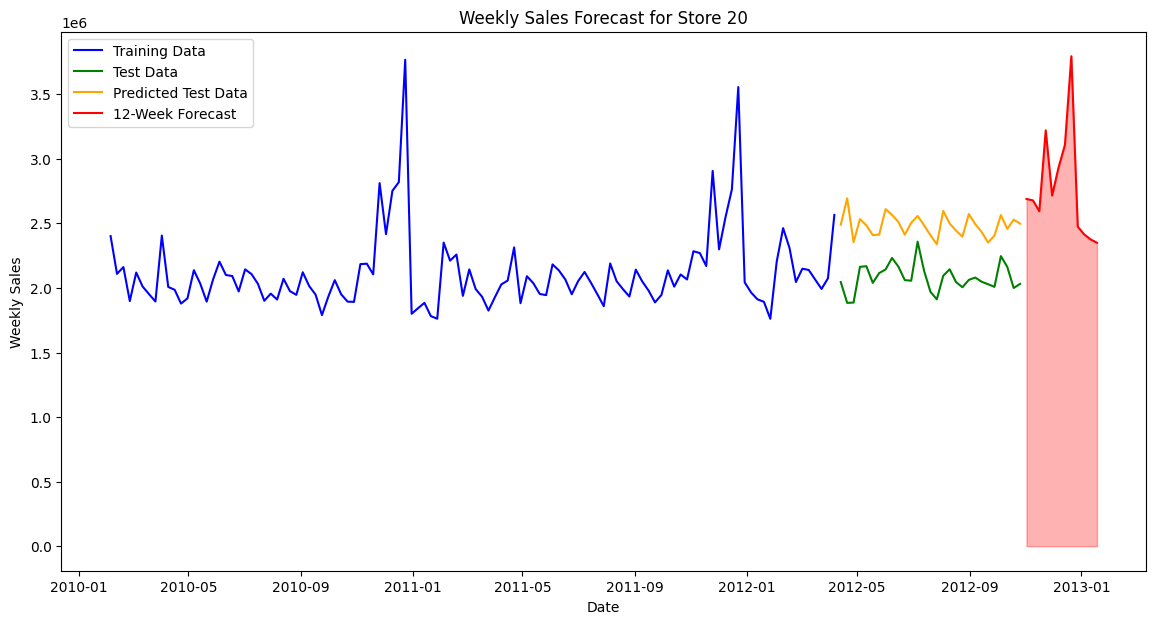

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



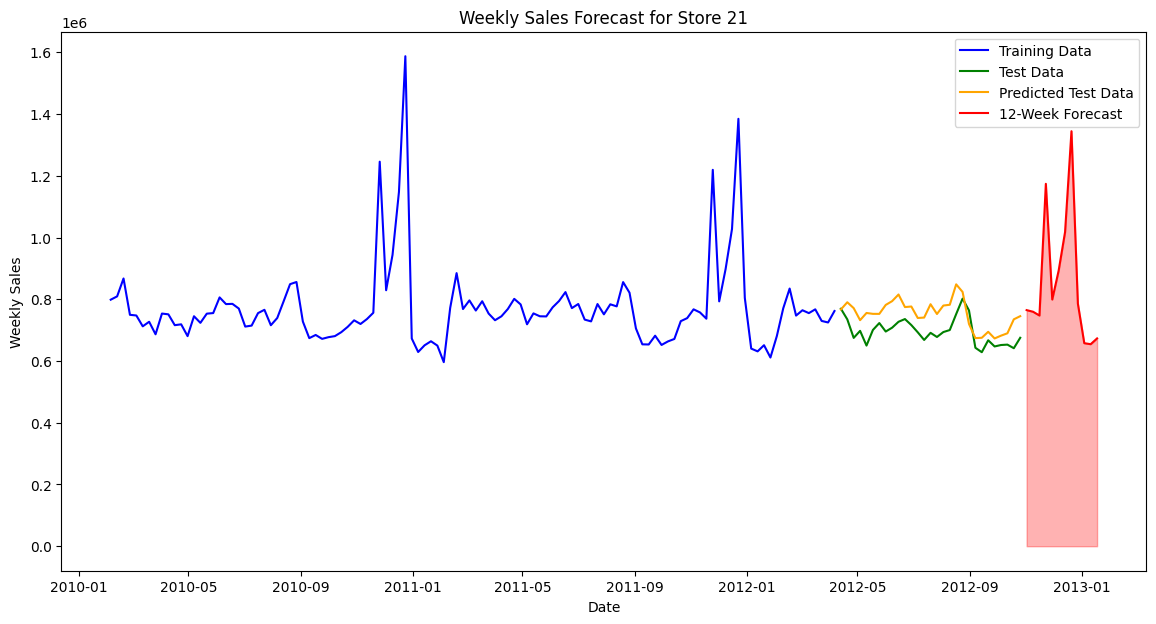

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



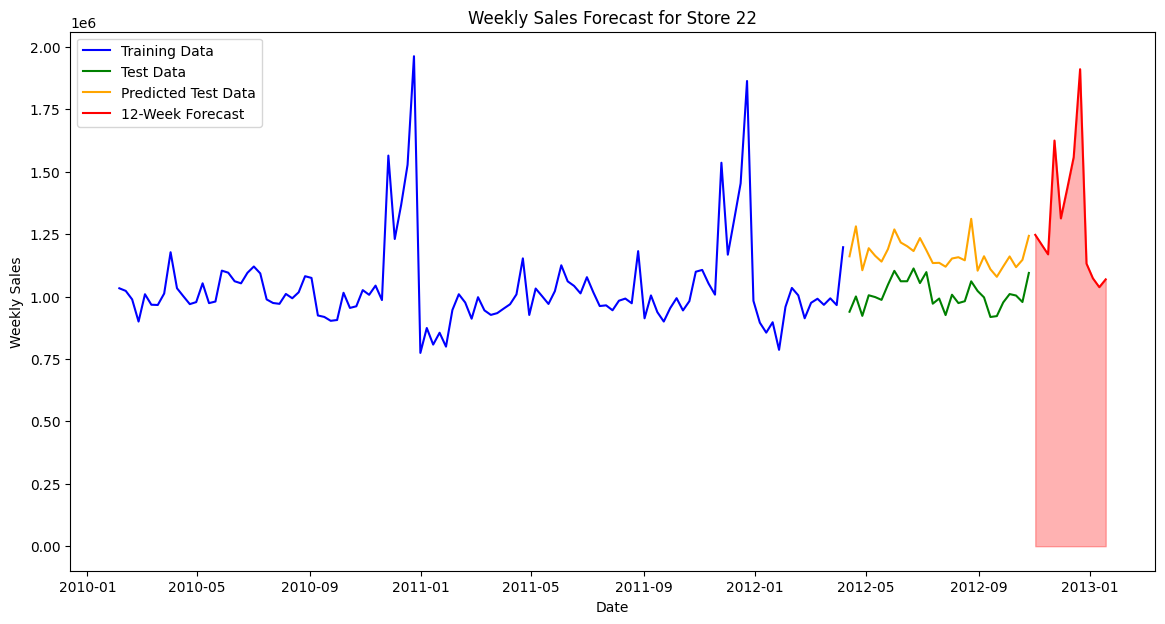

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



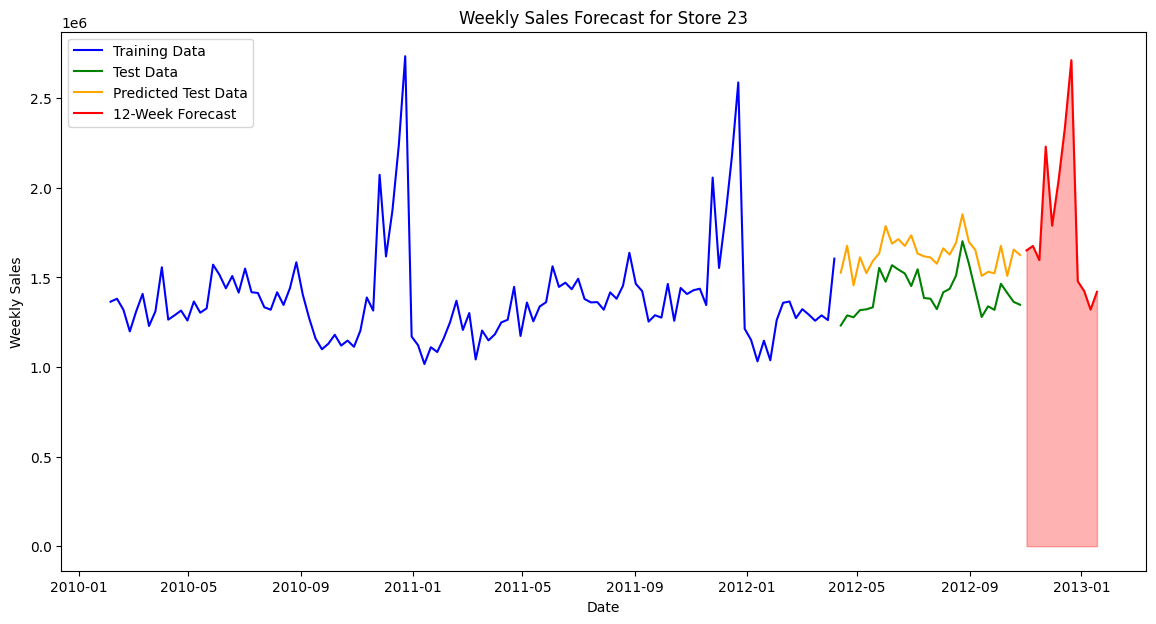

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



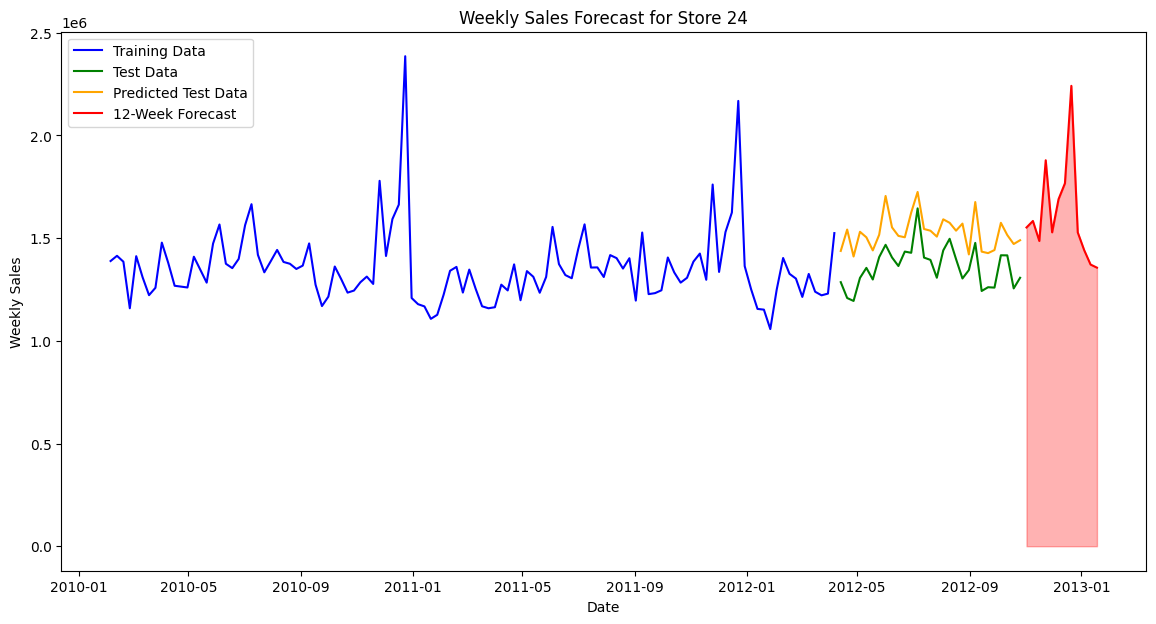

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



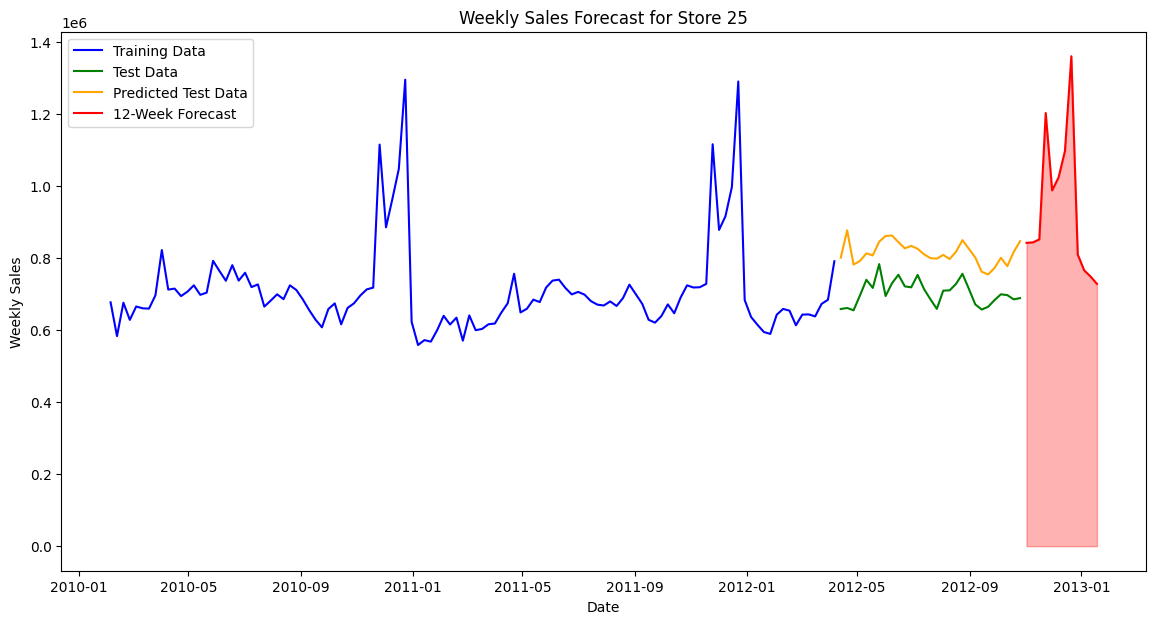

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



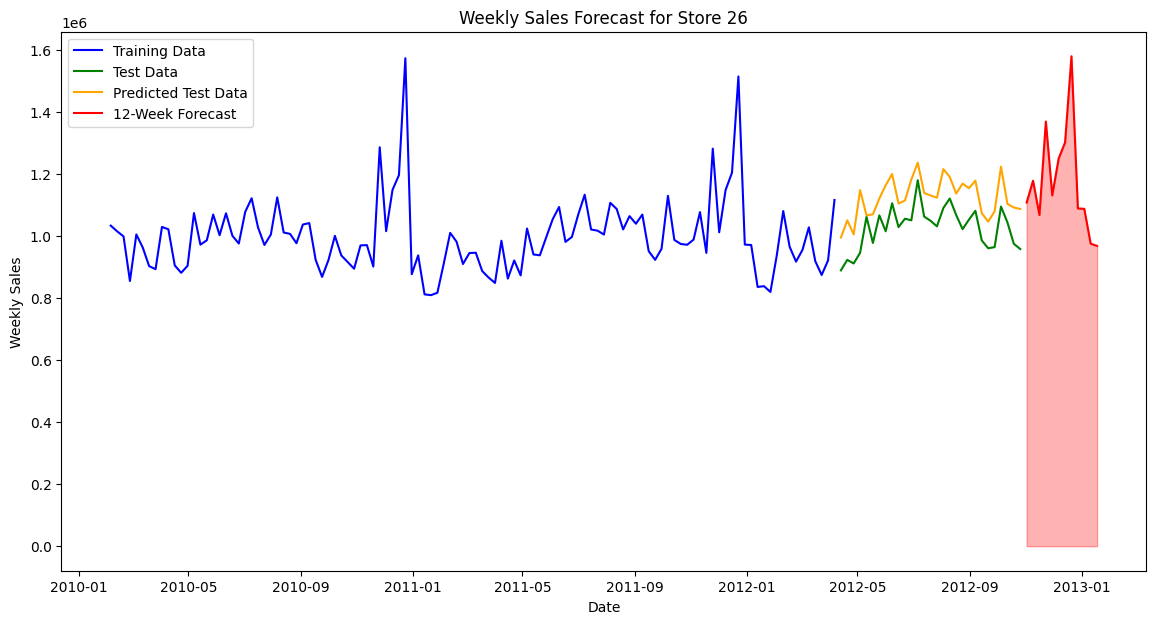

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



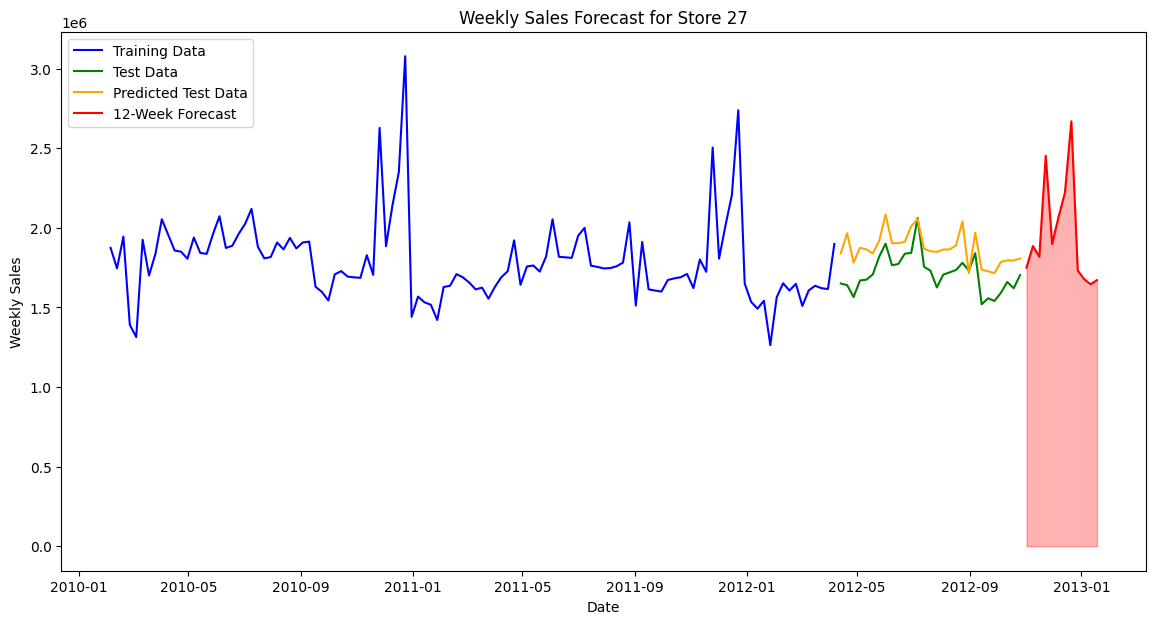

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



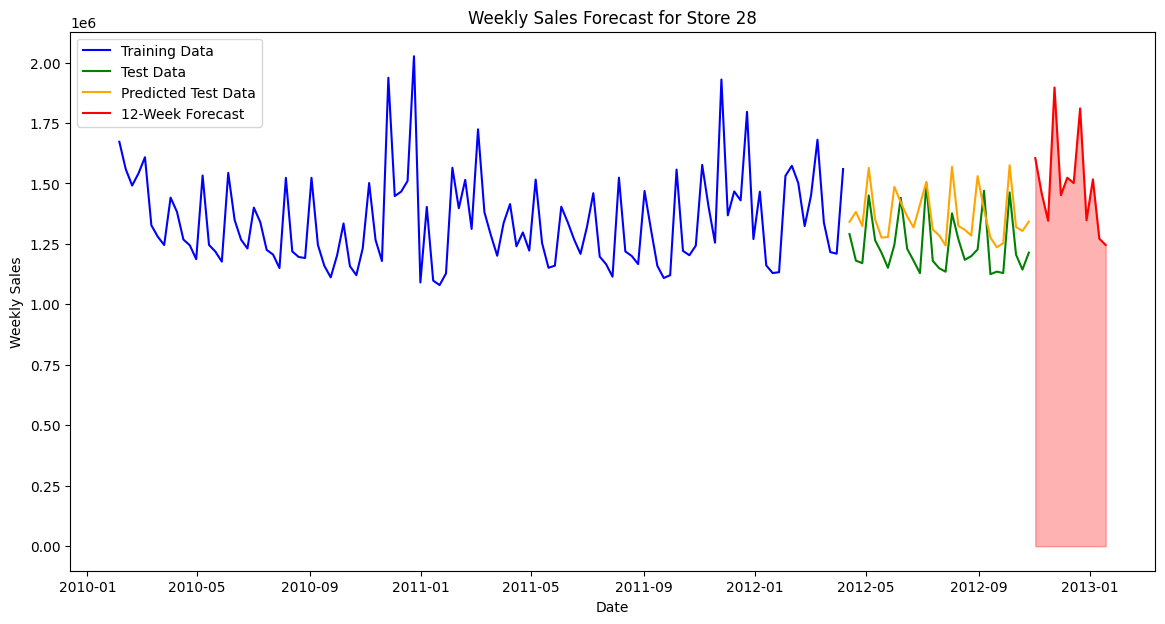

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



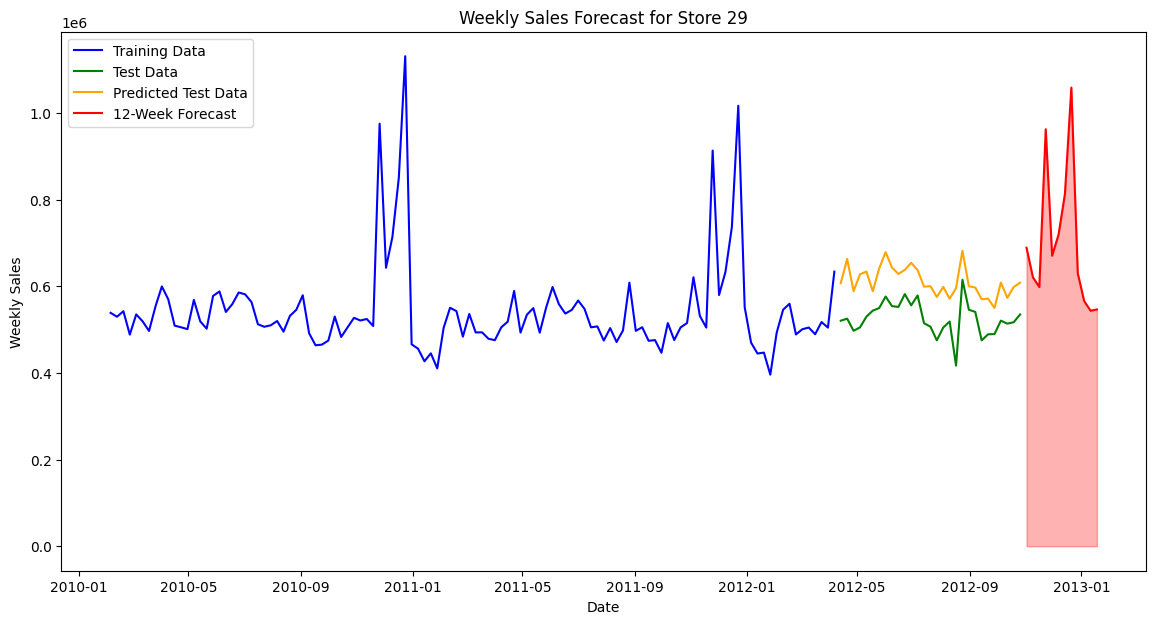

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



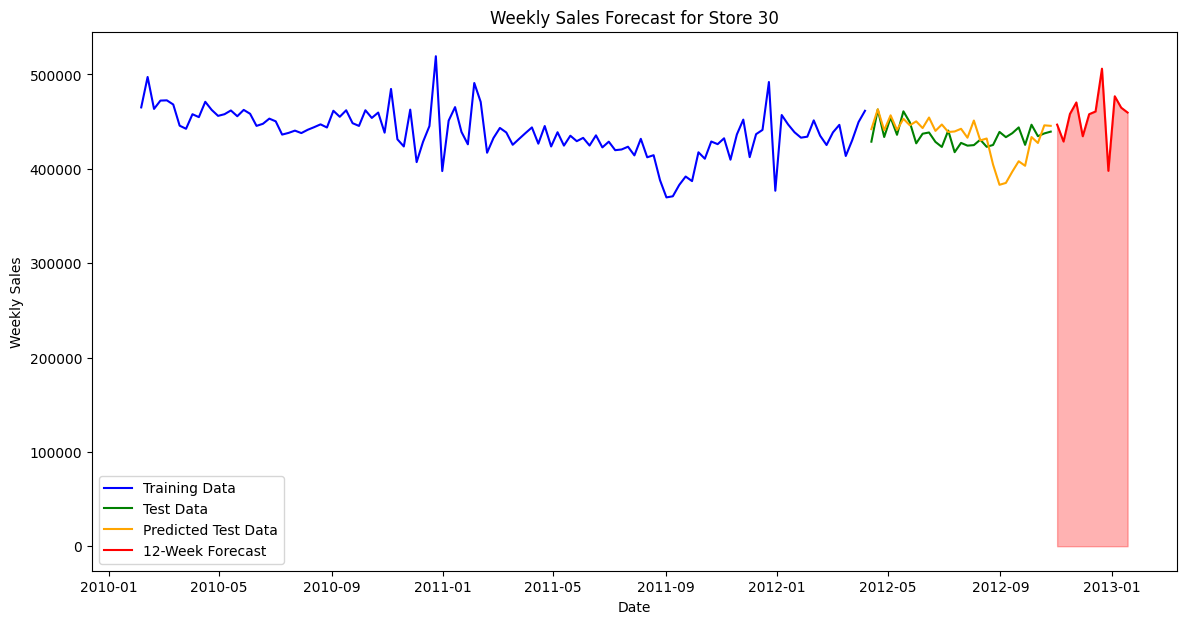

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



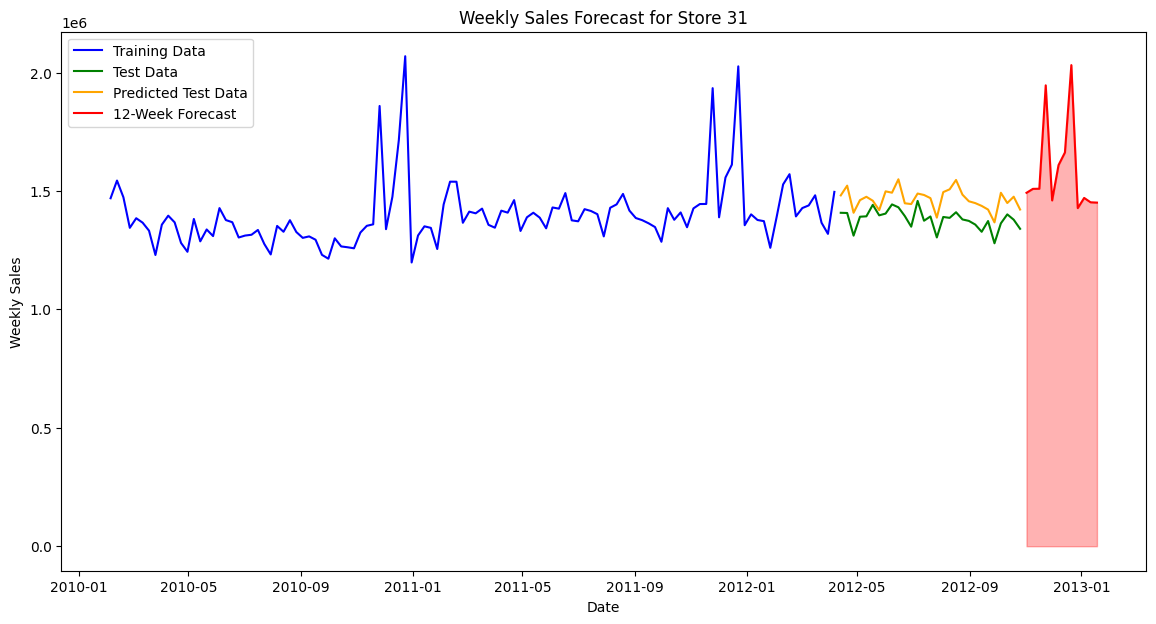

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



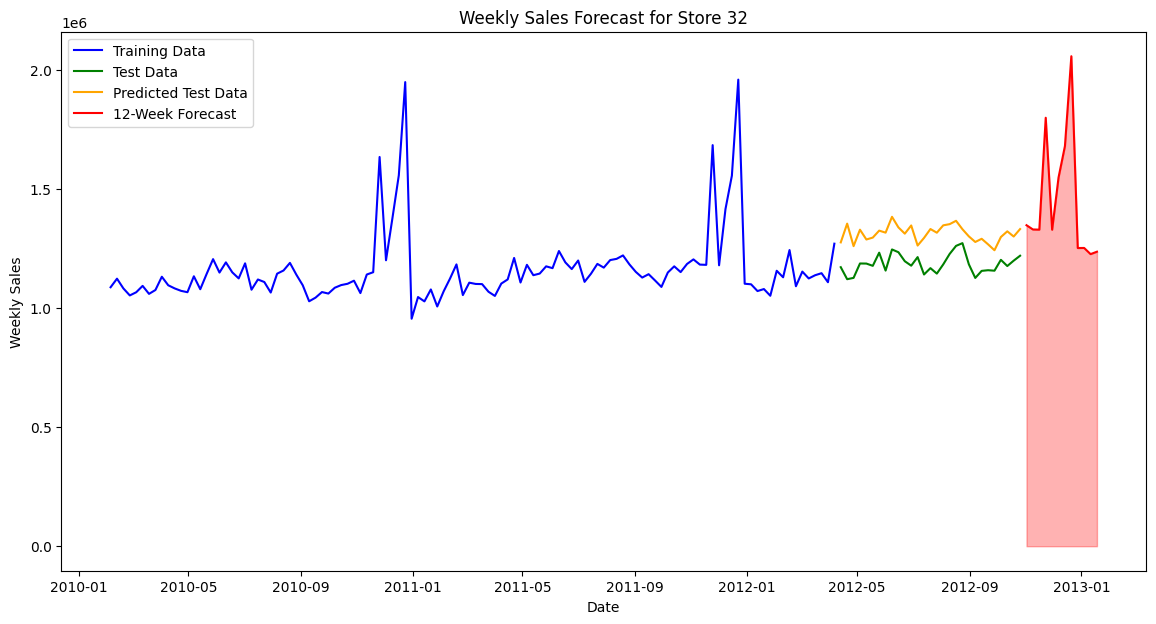

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



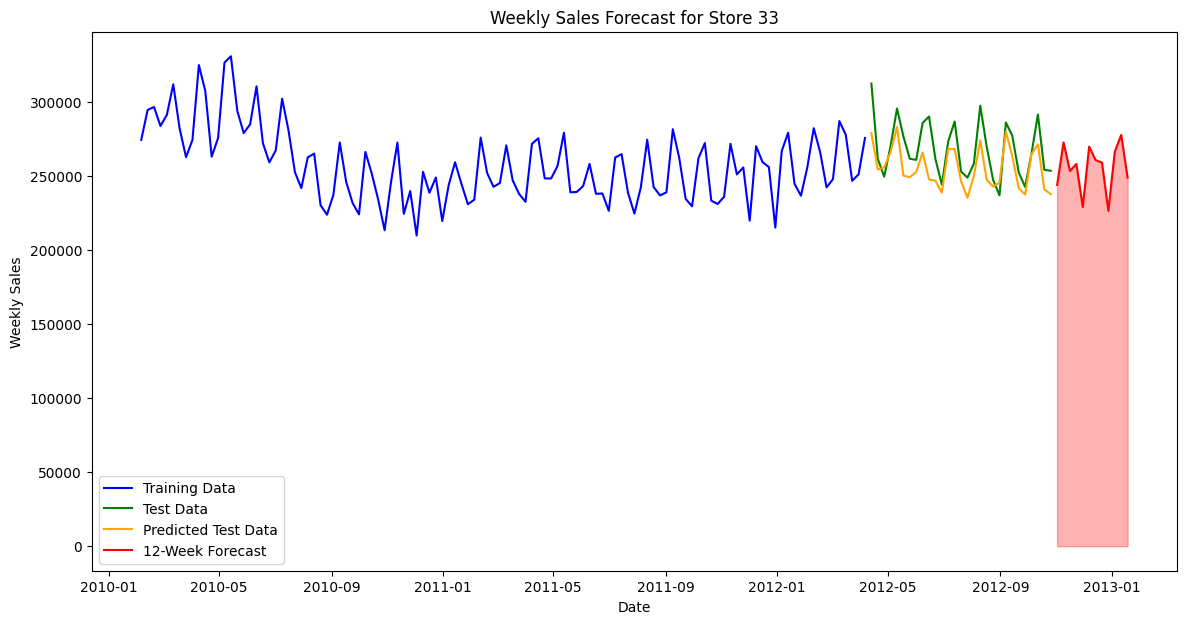

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



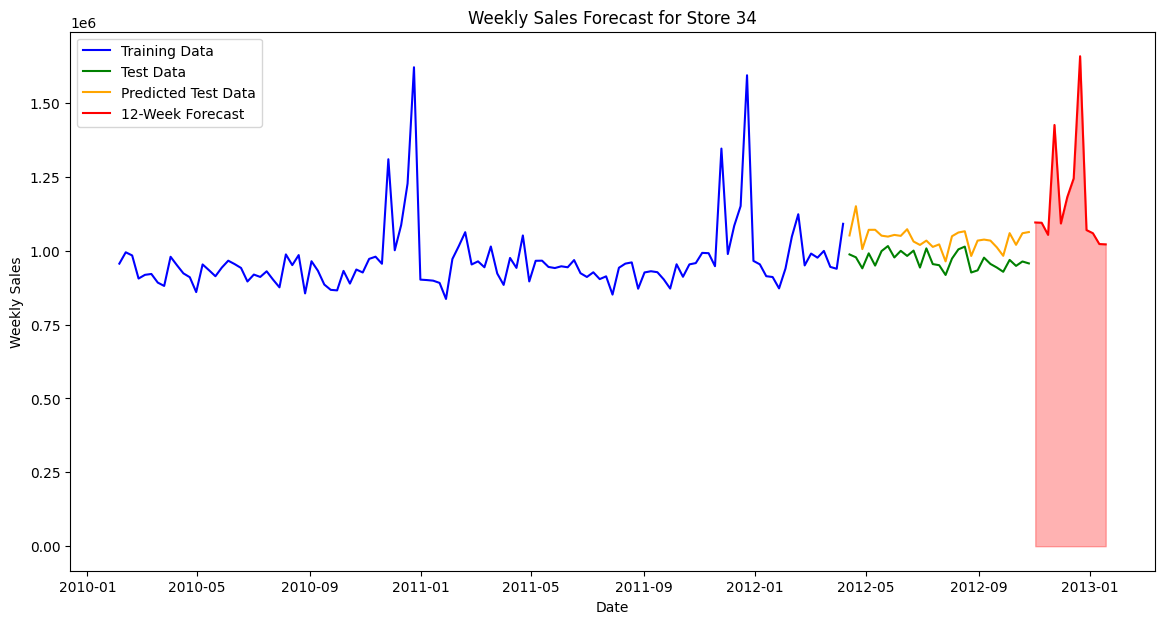

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



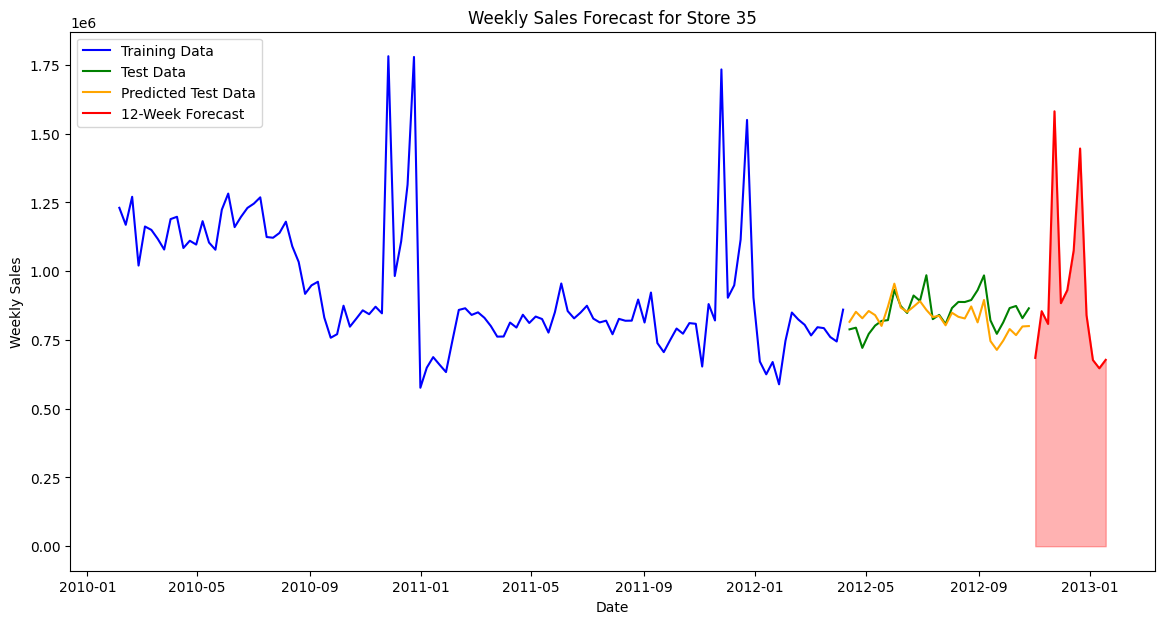

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



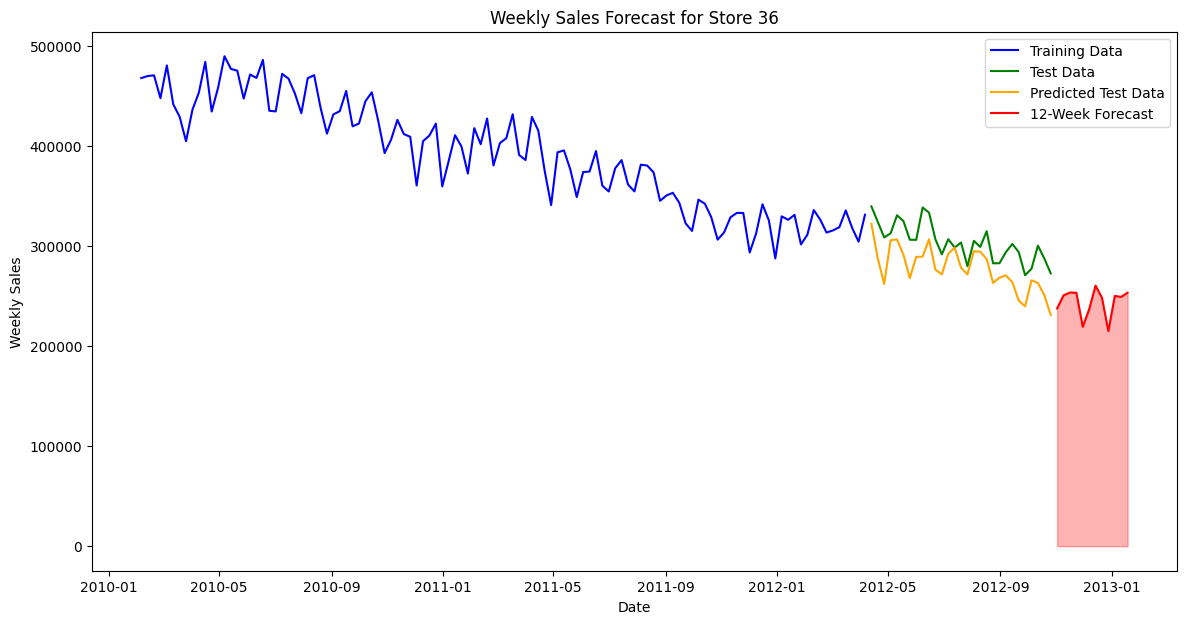

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



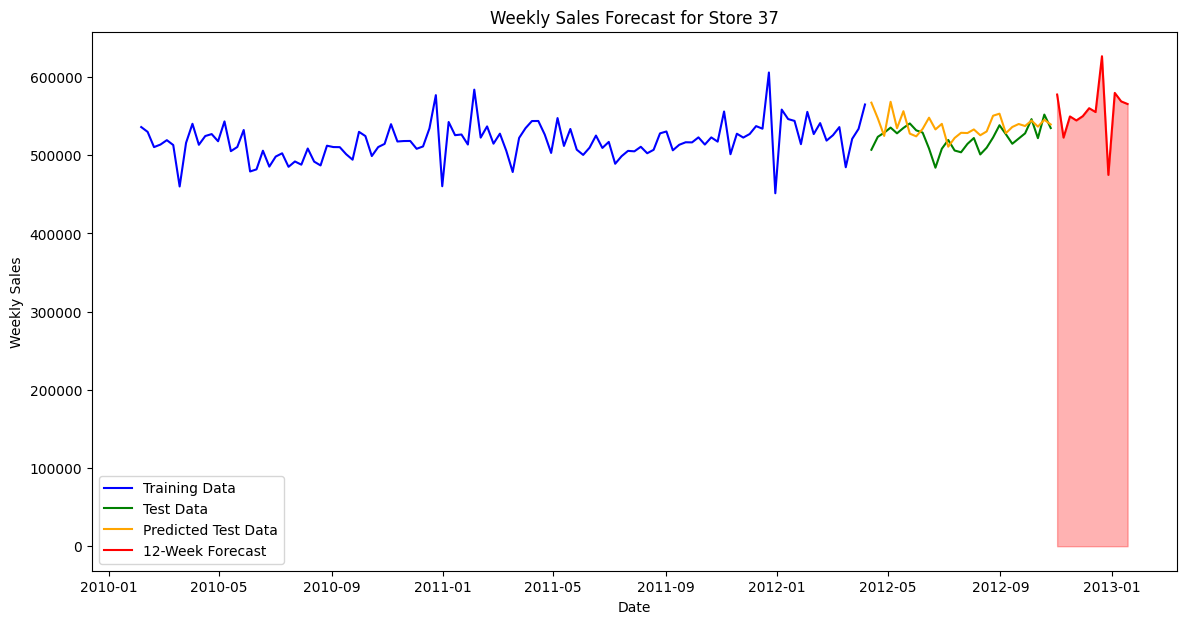

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



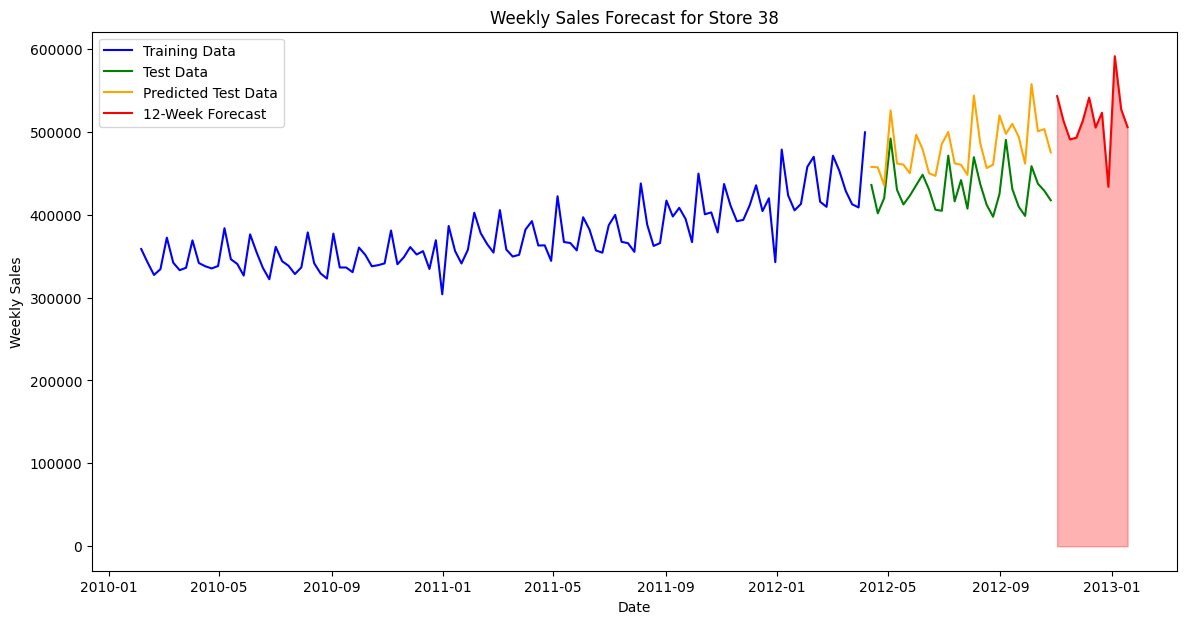

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



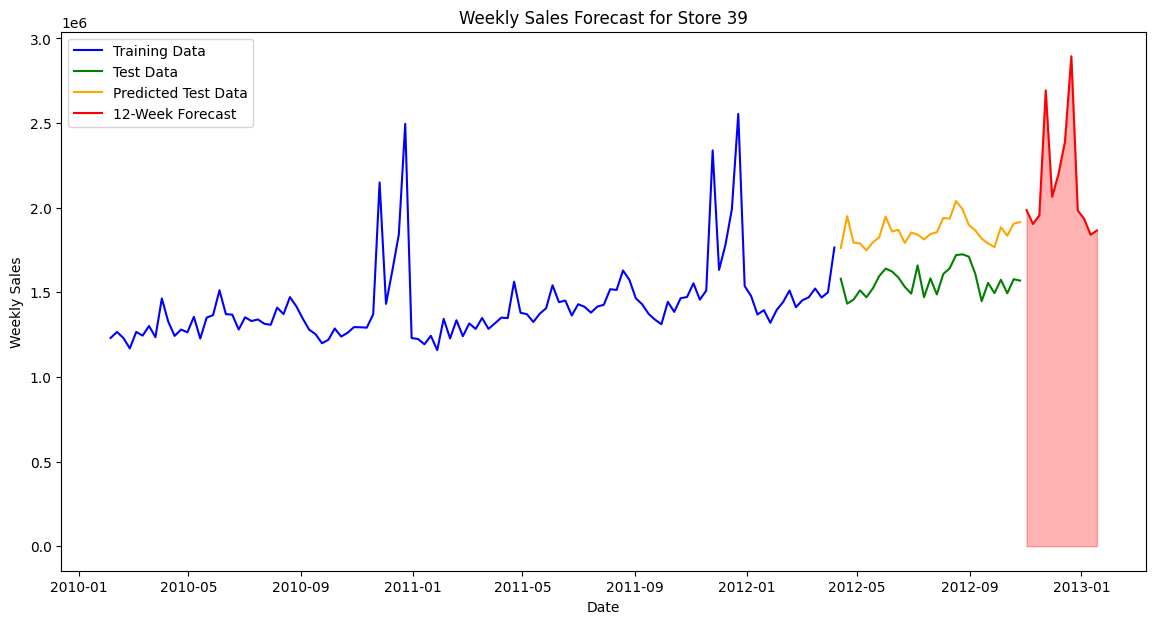

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



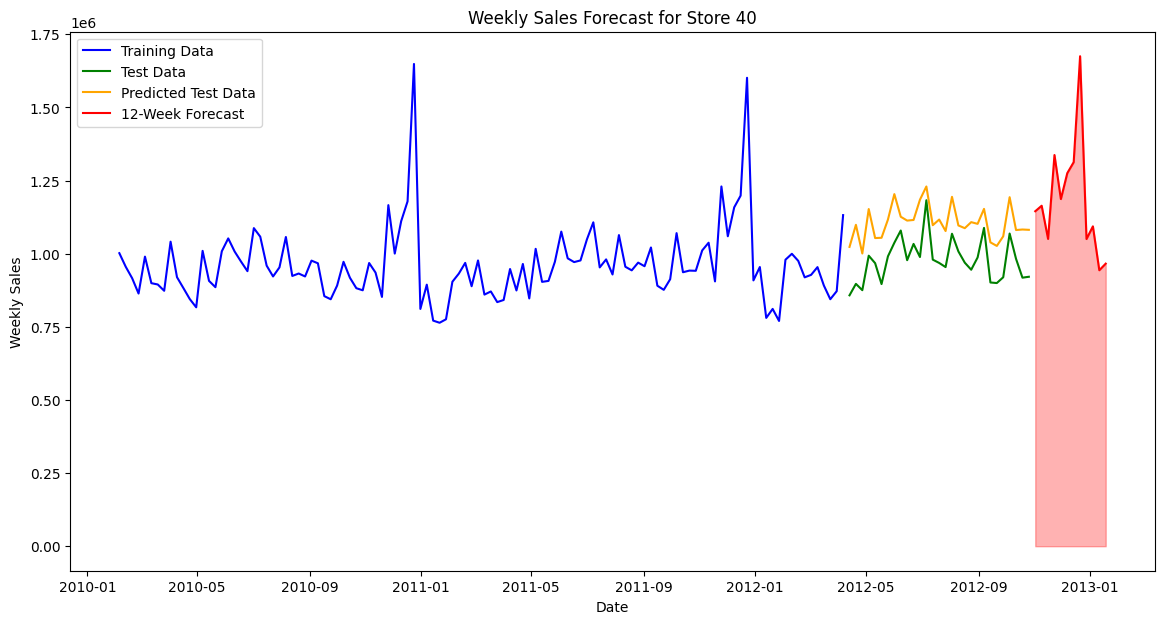

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



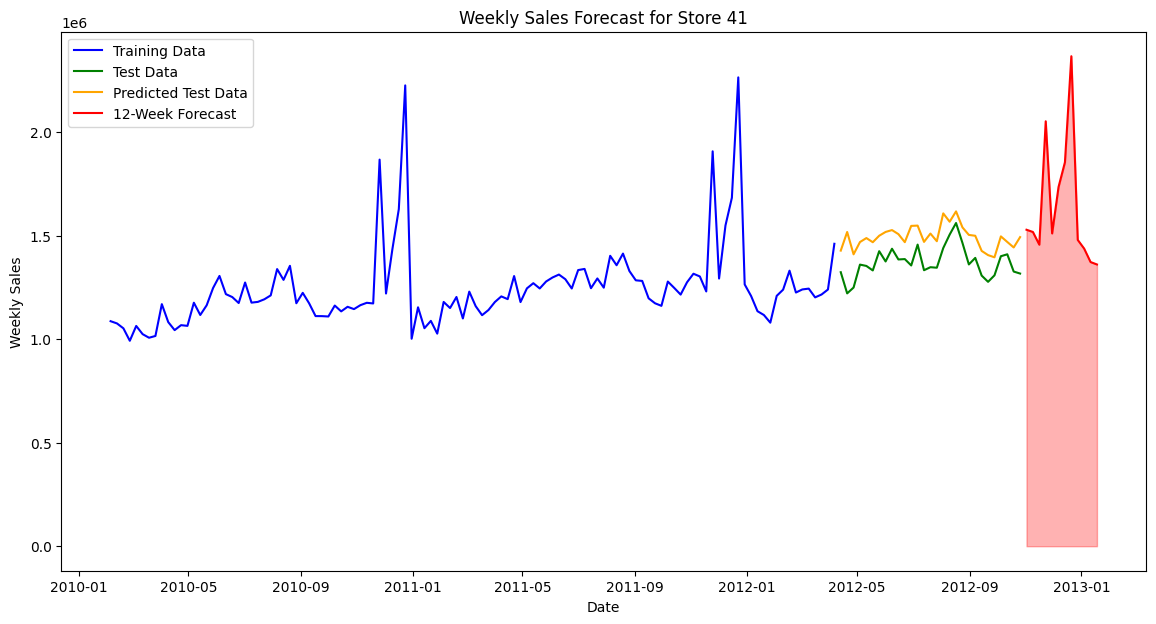

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



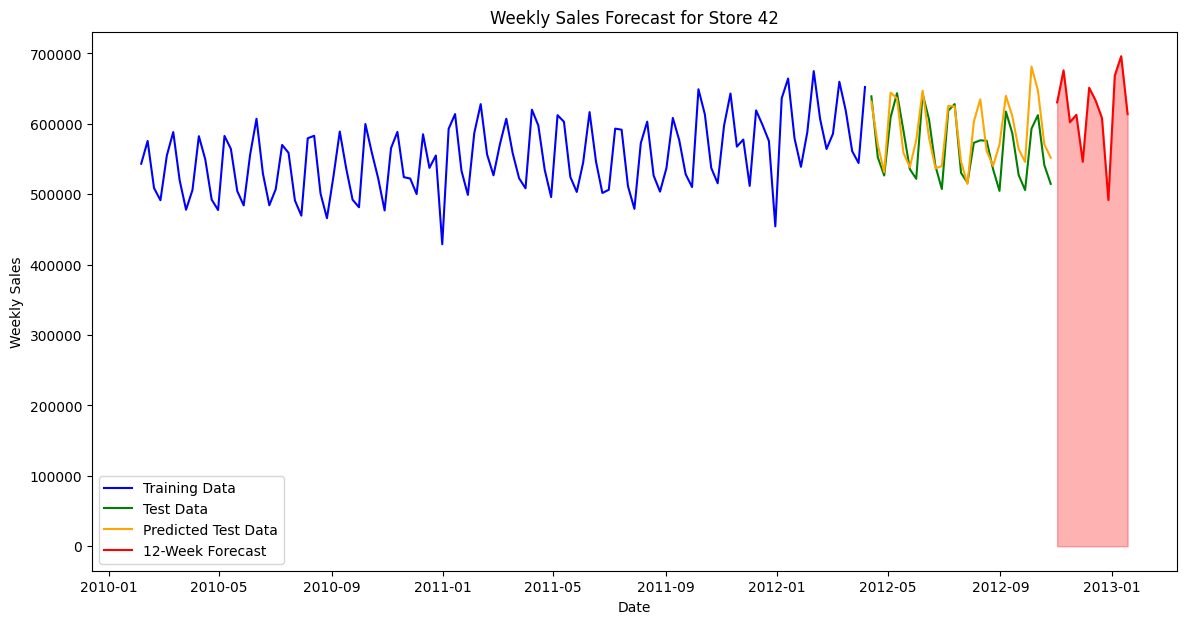

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



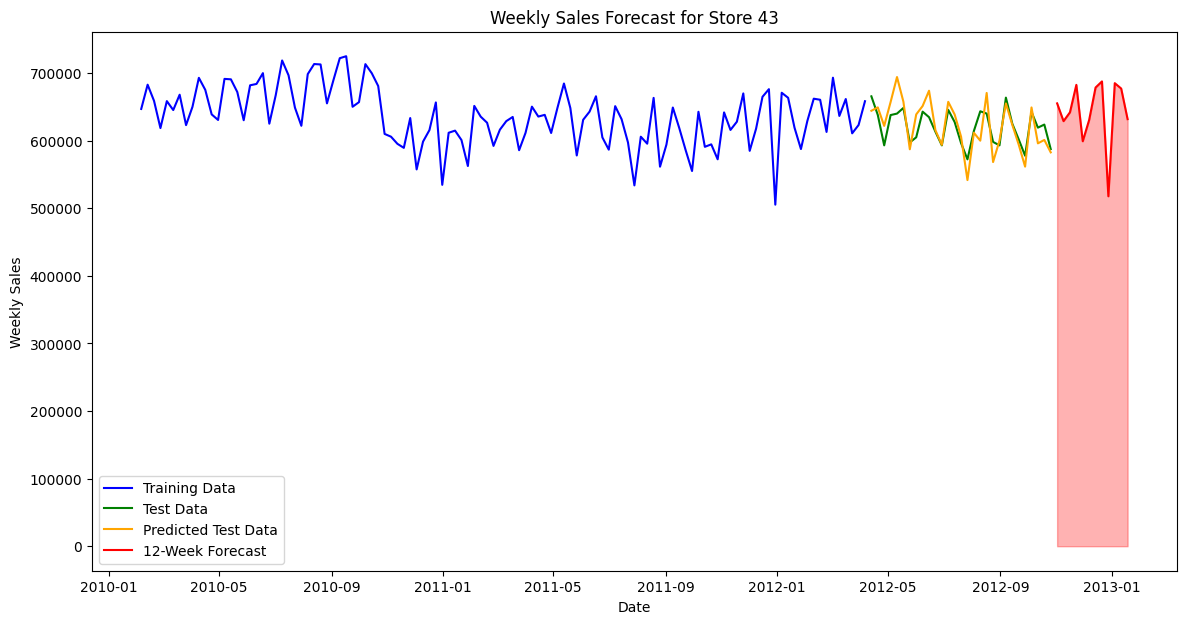

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



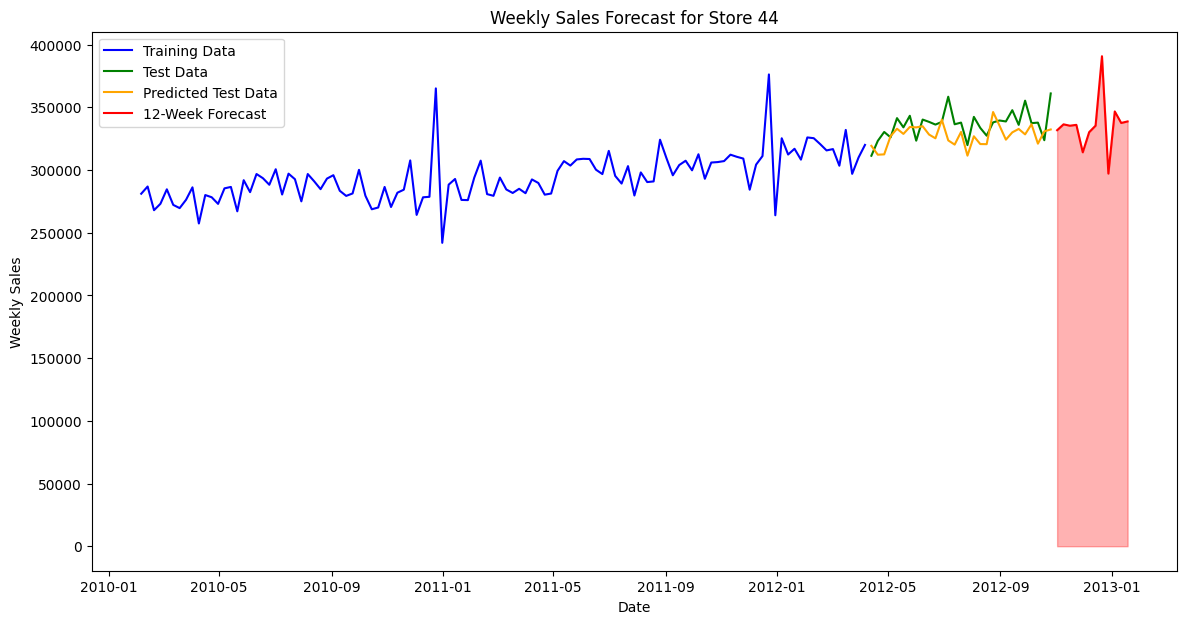

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



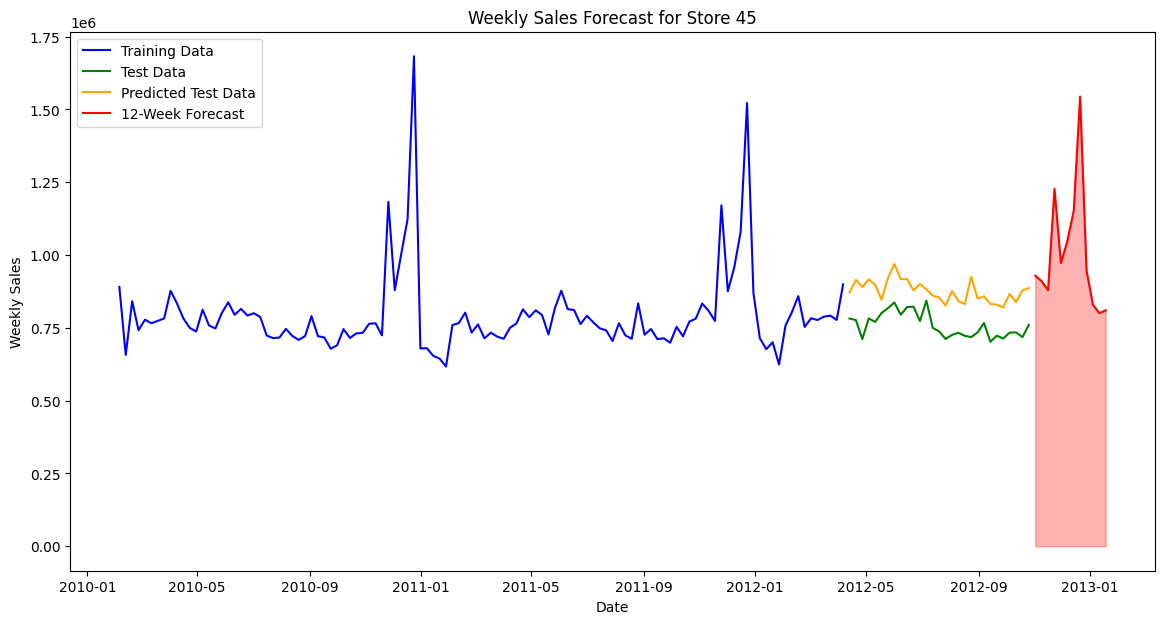

    Store            MAE           RMSE         R²
0       1  203230.536189  209926.267919  -5.943887
1       2  161787.659083  171183.430984  -4.346798
2       3   61013.405882   62413.045015 -14.157072
3       4  266583.172664  275780.175977 -20.215757
4       5   53496.487514   54727.882951 -10.516068
5       6  217756.068807  227048.751006  -3.562842
6       7   97114.686037  103154.286817  -0.222401
7       8   60915.675730   68850.319480  -4.069875
8       9   83986.953627   86352.223114 -10.266413
9      10  237686.406699  250564.888582  -9.421668
10     11  192067.445884  202890.876402  -7.304536
11     12   86718.818009   92415.001177  -1.953918
12     13  260038.673164  273506.798824 -12.704165
13     14  469940.905195  493908.707887  -6.522749
14     15   67935.146725   74785.286890  -1.750181
15     16   43580.301544   48584.425409   0.250389
16     17   84633.851080   91111.920692  -0.247840
17     18  102019.313895  119260.816277  -3.172850
18     19  201604.863823  21065

In [158]:

# Create an empty DataFrame to store forecasts and evaluation metrics
forecasts = pd.DataFrame()
metrics = []

# Loop over each store
for store_id in Walmart_Sales_Stores['Store'].unique():
    # Filter data for the current store
    store_data = Walmart_Sales_Stores[Walmart_Sales_Stores['Store'] == store_id]
    
    # Ensure the data is sorted by date
    store_data = store_data.sort_index()

    # Split the data into training and test sets (80% training, 20% test)
    train_size = int(len(store_data) * 0.8)
    train_data, test_data = store_data.iloc[:train_size], store_data.iloc[train_size:]
    
    # Fit the SARIMAX model on the training data
    model = SARIMAX(train_data['Weekly_Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
    model_fit = model.fit(disp=False)
    
    # Forecast the next 12 weeks (test period)
    forecast = model_fit.get_forecast(steps=len(test_data) + 12)
    forecast_dates = pd.date_range(start=test_data.index[0], periods=len(test_data) + 12, freq='W')
    
    # Create a DataFrame to store the forecast including the test period
    forecast_df = pd.DataFrame({
        'Store': store_id,
        'Date': forecast_dates,
        'Forecasted_Weekly_Sales': forecast.predicted_mean
    })

    # Append the forecast to the main DataFrame
    forecasts = pd.concat([forecasts, forecast_df], axis=0)
    
    # Evaluate model performance on the test set
    y_true = test_data['Weekly_Sales']
    y_pred = forecast_df['Forecasted_Weekly_Sales'][:len(test_data)]
    
    # Calculate MAE, RMSE, and R²
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    # Store the metrics
    metrics.append({
        'Store': store_id,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2
    })
    
    # Plot the results
    plt.figure(figsize=(14, 7))
    
    # Plot the training data
    plt.plot(train_data.index, train_data['Weekly_Sales'], label='Training Data', color='blue')
    
    # Plot the test data
    plt.plot(test_data.index, test_data['Weekly_Sales'], label='Test Data', color='green')
    
    # Plot the forecast data
    plt.plot(forecast_df.index[:len(test_data)], forecast_df['Forecasted_Weekly_Sales'][:len(test_data)], label='Predicted Test Data', color='orange')
    plt.plot(forecast_df.index[len(test_data):], forecast_df['Forecasted_Weekly_Sales'][len(test_data):], label='12-Week Forecast', color='red')
    
    # Highlight the forecast period
    plt.fill_between(forecast_df.index[len(test_data):], forecast_df['Forecasted_Weekly_Sales'][len(test_data):], color='red', alpha=0.3)
    
    # Add titles and labels
    plt.title(f'Weekly Sales Forecast for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.legend()
    
    # Show the plot
    plt.show()

# Convert metrics list to a DataFrame for better visualization
metrics_df = pd.DataFrame(metrics)

# Display the metrics
print(metrics_df)

# Reset the index of the forecasts DataFrame
forecasts.reset_index(drop=True, inplace=True)

# Display the forecasts
print(forecasts)


> Display the performance of the SARIMAX model used to forecast the 12 weeks sales for each store.

In [160]:
metrics_df

Store            MAE           RMSE         R²
0       1  203230.536189  209926.267919  -5.943887
1       2  161787.659083  171183.430984  -4.346798
2       3   61013.405882   62413.045015 -14.157072
3       4  266583.172664  275780.175977 -20.215757
4       5   53496.487514   54727.882951 -10.516068
5       6  217756.068807  227048.751006  -3.562842
6       7   97114.686037  103154.286817  -0.222401
7       8   60915.675730   68850.319480  -4.069875
8       9   83986.953627   86352.223114 -10.266413
9      10  237686.406699  250564.888582  -9.421668
10     11  192067.445884  202890.876402  -7.304536
11     12   86718.818009   92415.001177  -1.953918
12     13  260038.673164  273506.798824 -12.704165
13     14  469940.905195  493908.707887  -6.522749
14     15   67935.146725   74785.286890  -1.750181
15     16   43580.301544   48584.425409   0.250389
16     17   84633.851080   91111.920692  -0.247840
17     18  102019.313895  119260.816277  -3.172850
18     19  201604.863823  210652.305679  -5.743862
19     20  404086.667588  417670.063517 -15.103170
20     21   59088.372554   65364.631121  -1.416431
21     22  161958.807530  167671.678559  -8.237155
22     23  212380.379331  224336.053686  -3.075178
23     24  165186.594104  175383.649275  -2.262358
24     25  110544.034442  115078.924033 -10.950796
25     26   97559.359014  104349.282830  -1.458682
26     27  156900.313864  169502.299459  -1.133517
27     28  128189.018814  144615.545236  -0.572121
28     29   85497.127561   89873.635120  -4.491904
29     30   15909.942436   21259.328441  -2.710799
30     31   83812.833509   89220.634273  -3.827023
31     32  125983.922724  131256.374633 -10.221525
32     33   13427.693399   16362.560393   0.247300
33     34   71721.079807   77395.491328  -6.839596
34     35   49491.032048   61516.982860  -0.030191
35     36   25487.457546   28799.772663  -1.389775
36     37   18466.132612   23105.440639  -1.487980
37     38   50108.950980   55699.271425  -3.914076
38     39  294685.996720  302312.272124 -13.090296
39     40  128041.660824  133704.805669  -2.426702
40     41  122584.001719  131705.480732  -2.316360
41     42   25607.422689   33178.671196   0.463793
42     43   17467.004838   22155.304985   0.221147
43     44   11350.009893   13896.447822  -0.660176
44     45  116565.647773  121502.592425  -7.665077

> I tried to use a 2nd approach to forecast the average weekly sales for each store by aggregating the weekly sales for all store , just for my curiouslity.

In [78]:
duplicates = Walmart3.index[Walmart3.index.duplicated()]
print("Duplicate index values:", duplicates)



Duplicate index values: DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=6292, freq=None)


In [79]:
# Find duplicate indices
duplicates1 = Walmart3.index[Walmart3.index.duplicated(keep=False)]

# Count duplicates
duplicate_counts = duplicates1.value_counts()
print("Duplicate counts:\n", duplicate_counts)

Duplicate counts:
 Date
2010-02-05    45
2011-12-23    45
2011-11-11    45
2011-11-18    45
2011-11-25    45
              ..
2011-01-07    45
2011-01-14    45
2011-01-21    45
2011-01-28    45
2012-10-26    45
Name: count, Length: 143, dtype: int64


In [81]:
# Find duplicate dates
duplicates = Walmart3.index[Walmart3.index.duplicated(keep=False)]

# Filter rows with duplicate dates
duplicate_rows = Walmart3.loc[duplicates]

print("Rows with duplicate dates:")
print(duplicate_rows)

Rows with duplicate dates:
            Weekly_Sales
Date                    
2010-02-05    1643690.90
2010-02-05    2136989.46
2010-02-05     461622.22
2010-02-05    2135143.87
2010-02-05     317173.10
...                  ...
2012-10-26    1316542.59
2012-10-26     514756.08
2012-10-26     587603.55
2012-10-26     361067.07
2012-10-26     760281.43

[289575 rows x 1 columns]


In [82]:
# Aggregate by taking the mean of duplicate entries
Walmart4 = Walmart3.groupby(Walmart3.index).mean()


In [105]:
Walmart5 = Walmart4[['Weekly_Sales']]
Walmart5

Weekly_Sales
Date                    
2010-02-05  1.105572e+06
2010-02-12  1.074148e+06
2010-02-19  1.072822e+06
2010-02-26  9.770794e+05
2010-03-05  1.041588e+06
...                  ...
2012-09-28  9.718867e+05
2012-10-05  1.057036e+06
2012-10-12  1.025078e+06
2012-10-19  1.002720e+06
2012-10-26  1.012091e+06

[143 rows x 1 columns]

In [75]:
Walmart3

Weekly_Sales
Date                    
2010-02-05    1643690.90
2010-02-12    1641957.44
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-03-05    1554806.68
...                  ...
2012-09-28     713173.95
2012-10-05     733455.07
2012-10-12     734464.36
2012-10-19     718125.53
2012-10-26     760281.43

[6435 rows x 1 columns]

In [73]:
Walmart3.duplicated().sum()

0

In [106]:

train = Walmart5[:-12]  # Training data (excluding the last 12 weeks)
test = Walmart5[-12:]   # Test data (last 12 weeks for evaluation)

In [107]:

train

Weekly_Sales
Date                    
2010-02-05  1.105572e+06
2010-02-12  1.074148e+06
2010-02-19  1.072822e+06
2010-02-26  9.770794e+05
2010-03-05  1.041588e+06
...                  ...
2012-07-06  1.138956e+06
2012-07-13  1.024438e+06
2012-07-20  1.023545e+06
2012-07-27  9.799368e+05
2012-08-03  1.055242e+06

[131 rows x 1 columns]

2. We fit the SARIMA model

In [99]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [108]:

model = SARIMAX(train, order=(2,0,1), seasonal_order=(2,0,1,52))


c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



In [109]:
model = model.fit()

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



<Axes: xlabel='Date'>

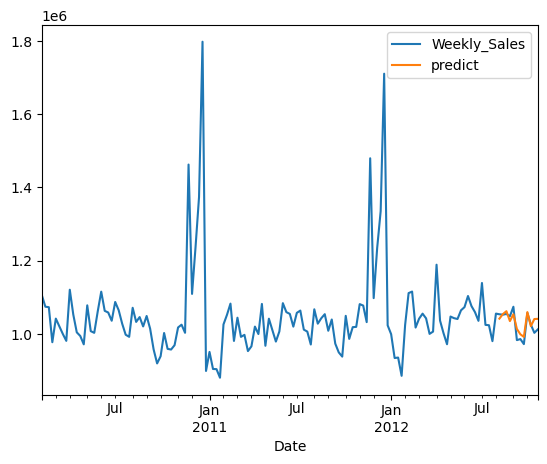

In [110]:
Walmart4['predict']=model.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
Walmart4[['Weekly_Sales','predict']].plot()

>Forecast 12 weeks from the end of the training data 

<Axes: xlabel='Date'>

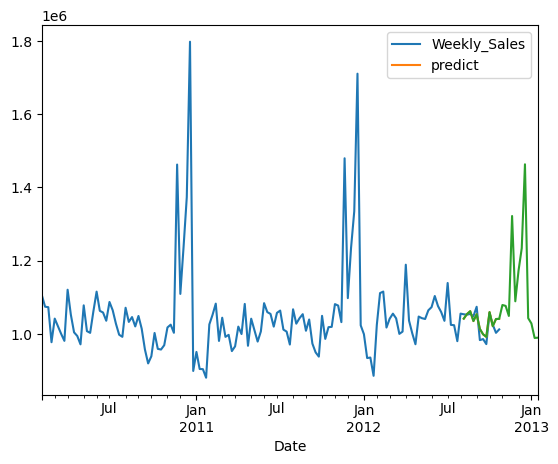

In [125]:
forecast = model.forecast(steps=24)
Walmart4.plot()
forecast.plot()

#**ITERTOOLS:**


used to choose the optimal p,d,q values

In [112]:
import itertools

In [113]:
#give the range of p,d and q
p = range(0,8)
d = range(0,2)
q = range(0,8)

In [114]:
pdq_combinations = list(itertools.product(p,d,q))
print(len(pdq_combinations))

128


In [115]:
pdq_combinations

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 0, 6),
 (2, 0, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 0, 5),
 (3, 0, 6),
 (3, 0, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 0, 5),
 (4, 0, 6),
 (4, 0, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 0, 0),
 (5, 0, 1),
 (5, 0, 2),
 (5,

In [116]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combinations:
  model = ARIMA(train,order=pdq)
  model_fit=model.fit()
  pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
  error = np.sqrt(mean_squared_error(test,pred))
  order1.append(pdq)
  rmse.append(error)

results = pd.DataFrame(index=order1,data=rmse,columns=["RMSE"])
results

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequ

RMSE
(0, 0, 0)  39870.743273
(0, 0, 1)  39849.795720
(0, 0, 2)  39854.999232
(0, 0, 3)  39913.987146
(0, 0, 4)  43957.610203
...                 ...
(7, 1, 3)  44228.144103
(7, 1, 4)  45300.956974
(7, 1, 5)  42682.361382
(7, 1, 6)  46419.677049
(7, 1, 7)  51137.729540

[128 rows x 1 columns]

In [117]:
results.sort_values("RMSE") #Least RMSE score are best hyperparamterer for (p,d,q) values

RMSE
(3, 1, 0)  33514.655691
(0, 1, 1)  33806.971696
(2, 1, 0)  34225.747664
(1, 1, 2)  34492.312494
(3, 1, 1)  34778.883956
...                 ...
(6, 0, 6)  52806.193815
(7, 0, 6)  54005.274026
(7, 0, 5)  54527.549085
(7, 0, 7)  54886.921898
(6, 0, 7)  57128.201980

[128 rows x 1 columns]

In [118]:
model = SARIMAX(train, order=(2,0,1), seasonal_order=(2,0,1,52))

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



In [119]:
model = model.fit()

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



<Axes: xlabel='Date'>

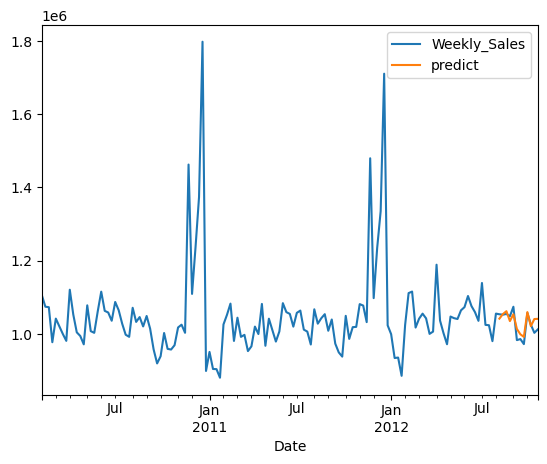

In [120]:
Walmart5['predict']=model.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
Walmart5[['Weekly_Sales','predict']].plot()

<Axes: xlabel='Date'>

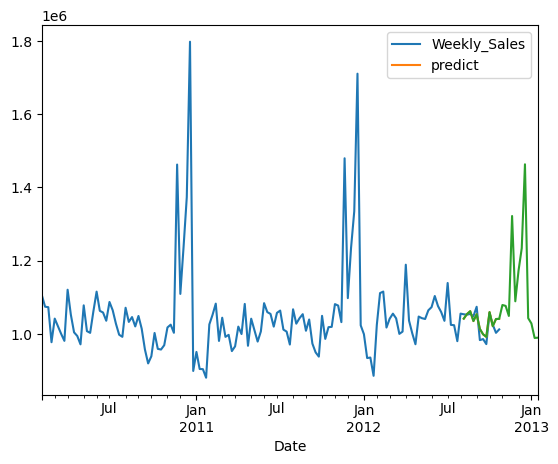

In [121]:
forecast = model.forecast(steps=24)
Walmart4.plot()
forecast.plot()

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Forecasting on the test set (or out-of-sample data)
forecast_steps = len(test)
forecast_index = pd.date_range(start=Walmart_weeklySales.index[-forecast_steps], periods=forecast_steps, freq='W')
forecast = sarima_fit.get_forecast(steps=forecast_steps).predicted_mean

# Calculate accuracy metrics
actual = test['Weekly_Sales']
mae = mean_absolute_error(actual, forecast)
mse = mean_squared_error(actual, forecast)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



Mean Absolute Error (MAE): 65686.58
Mean Squared Error (MSE): 8028960455.69
Root Mean Squared Error (RMSE): 89604.47


c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\adeye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

